# ***Projet 06 - Analyse des ventes - Librairie LAPAGE***


---
## Partie 1 - Préparation

### 1. *Import des librairies (ok)*
---

In [1]:
# Mes imports de lib de base
import pandas as pd # Pour travail avec les df
import numpy as np # Tout ce qui est fct math avec numpy, tjs utile

# Pour les graphiques
import matplotlib.pyplot as plt # Graphes avec matplotlib
import seaborn as sns # Graphes avec seaborn
sns.set_style('darkgrid', {'grid.color': '.5', 'grid.linestyle': ':'}) # Défini un fond de graphe que ce soit pour sns ou plt

# Gestion des datetime
from datetime import datetime as dt # Pour la gestion des dates

# Pour les stats
import scipy.stats as stats # Pour des stats avec scipy
import statsmodels.api as sm # Pour des régressions linéaires ou autre

### *2. Infos sur les fichiers (df) - Préparation (ok)*
---

In [2]:
# Note sur les vérifications à faire sur les df :
    # Vérifier valeur manquantes
    # Vérifier clés uniques et doublons pour jointures
    # Vérifier format des colonnes
    # Préparer les df au niveau des données avant merge
    # Traiter le df final une fois les merge fait

#### *2.1. Customers (ok)*

In [3]:
# Import fichier clients
df_customers = pd.read_csv('customers.csv')

In [4]:
# Visu du fichier
# Pas besoin de faire un mapping pour rename les colonnes, on se contentera de ça, asser explicite
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [5]:
# Première infos sur le df
# info et describe du df
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [6]:
# Le plus vieux client est de 1929 et le plus jeune de 2004
df_customers.describe(include = 'all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [7]:
# Recherche de données manquantes
# Pas de manquants sur ce df
df_customers.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [8]:
# Recherche de doublons sur le df entier, on skip pas les NaN et on classe par ordre décroissant pour avoir les doublons en premier
print(df_customers.value_counts(dropna = False, ascending = False))

client_id  sex  birth
c_1        m    1955     1
c_6168     f    1977     1
c_6180     m    1957     1
c_618      m    1968     1
c_6179     m    1974     1
                        ..
c_3581     m    1966     1
c_3580     m    2004     1
c_358      f    1974     1
c_3579     m    1952     1
ct_1       m    2001     1
Length: 8623, dtype: int64


In [9]:
# Conclusions :
    # Pas de données manquantes
    # Pas de doublons dans les lignes
    # Pas de valeurs abérrantes, le plus vieux est de 1929 et le plus jeune de 2004

    # Penser à rajouter une colonne avec l'age des clients (ok)
    # Pk pas ne pas rajouter une tranche d'age ?
    # La clé de ce df sera client_id

In [10]:
# Calcul de l'age des clients et ajout d'une colonne, on récupère l'année en cours dans date puis on calcul
date = dt.today() # On recupère la date d'aujourd'hui
df_customers['age'] = date.year - df_customers['birth'] # On calcul l'age par apport à l'année en cours
# Affichage du df_customers final
df_customers

,client_id,sex,birth,age
0,c_4410,f,1967,56
1,c_7839,f,1975,48
2,c_1699,f,1984,39
3,c_5961,f,1962,61
4,c_5320,m,1943,80
...,...,...,...,...
8618,c_7920,m,1956,67
8619,c_7403,f,1970,53
8620,c_5119,m,1974,49
8621,c_5643,f,1968,55


#### *2.2. Products (ok)*

In [11]:
# Fichier produits
# Pas besoin de faire un mapping pour rename les colonnes
df_products = pd.read_csv('products.csv')

In [12]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [13]:
# info et describe du df
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [14]:
df_products.describe(include = 'all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [15]:
# On remarque 1 produit avec un prix négatif, test ? cadeau ? On garde et on traitera une fois les jointures faites
# Cela ressemble à un produit de test au vu de l'id_prod, phase de test du site ?

In [16]:
df_products.loc[df_products['price'] == -1]

,id_prod,price,categ
731,T_0,-1.0,0


In [17]:
# Recherche de manquants
# Pas de NaN dans le df
df_products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [18]:
# Recherche de doublons sur le df entier, on skip pas les NaN et on classe par ordre décroissant pour avoir les potentiels doublons en premier
print(df_products.value_counts(dropna = False, ascending = False))

id_prod  price   categ
0_0       3.75   0        1
0_899     19.99  0        1
0_89      14.99  0        1
0_890     2.81   0        1
0_891     21.99  0        1
                         ..
0_1987    6.99   0        1
0_1988    9.86   0        1
0_1989    3.99   0        1
0_199     8.99   0        1
T_0      -1.00   0        1
Length: 3287, dtype: int64


In [19]:
# Conclusions :
    # Pas de données manquantes
    # Pas de doublons sur les lignes du df
    # Une valeur abérrante (-1) sur les prix, on retient son id_pro : T_0

    # On garde le df tel quel pour voir a quoi correspond le prix négatif
    # La clé de ce df sera id_prod

#### *2.3. Transactions (ok)*

In [20]:
# Fichier ventes, il nous servira de centre entre clients et produits pour les merges
# Pas besoin de faire un mapping pour rename les colonnes cela convient comme cela
# Voir pour les dates sous un autre format et peut être regrouper par client et date si achats multiple d'un client, ce point à voir avec un gb, ça peut être intéressant
df_sales = pd.read_csv('transactions.csv')

In [21]:
# On regarde les headers
df_sales.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [22]:
# info et describe du df
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [23]:
df_sales.describe(include = 'all')

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [24]:
# Plus gros client c_1609 ? Plus de 25 000 commandes...
# Produit le plus vendu 1_369 avec 2252 transactions

# 3267 produits uniques vendus contre 3287 produits en vente donc 20 produits qui n'ont pas de ventes
# 8602 id clients actifs contre 8623 enregistrés donc 21 clients qui n'ont pas fait d'achats

# Une date "test", pour l'instant on la garde, on traitera une fois les jointures faites
# On le garde, on verras ce que l'on en fait plus tard pour garder ces ventes tout de même
# Plus grosse vente le 1_369
df_sales.loc[df_sales['client_id'] == 'c_1609']

,id_prod,date,session_id,client_id
67,0_1446,2022-10-05 07:43:00.225116,s_278030,c_1609
86,0_1102,2021-10-24 13:25:39.888945,s_109442,c_1609
101,0_1574,2021-10-06 02:49:56.811547,s_100652,c_1609
149,0_2291,2021-03-07 15:58:19.235606,s_3088,c_1609
163,0_1611,2022-03-06 15:36:09.926131,s_175223,c_1609
...,...,...,...,...
679353,1_313,2023-01-18 16:14:49.833646,s_328807,c_1609
679385,0_1335,2021-03-22 08:57:54.806815,s_9844,c_1609
679395,0_1441,2021-08-31 11:25:29.198346,s_83113,c_1609
679429,0_1419,2021-04-02 13:23:57.034357,s_14951,c_1609


In [25]:
# Les dates test
# L'id session et client me fait penser a un compte test pour vérifier le fonctionnement du site au démarrage, ct_0 = Client Test ?
# A traiter après merge, on remarque un id_prod T_0, produit de test pour fonctionnement du site ?
df_sales.loc[df_sales['date'].str.contains('test')]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [26]:
# Recherche de manquants
df_sales.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [27]:
# Recherche de doublons sur le df entier
# On remarque des doublons qui peuvent correspondrent à plusieurs transactions sur le même produit le même jour
# On remarque bien le client 'test' qui a fait env 200 transactions le même jour
df_sales.value_counts(dropna = False, ascending = False)

id_prod  date                             session_id  client_id
T_0      test_2021-03-01 02:30:02.237413  s_0         ct_0         9
         test_2021-03-01 02:30:02.237446  s_0         ct_0         6
         test_2021-03-01 02:30:02.237428  s_0         ct_0         6
         test_2021-03-01 02:30:02.237414  s_0         ct_1         5
         test_2021-03-01 02:30:02.237412  s_0         ct_1         5
                                                                  ..
0_1486   2021-10-19 10:55:26.309106       s_107043    c_8574       1
         2021-10-19 19:40:46.255072       s_107217    c_8081       1
         2021-10-20 09:35:53.715307       s_107500    c_6820       1
         2021-10-21 16:10:11.944606       s_108097    c_459        1
T_0      test_2021-03-01 02:30:02.237450  s_0         ct_0         1
Length: 679406, dtype: int64

In [28]:
# Nos doublons correspondent aà un même produit, une même session et un même client
df_sales.loc[df_sales.duplicated(keep = False)]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [29]:
# Conlusions :
    # Voir à quoi correspond les dates "test"
    # Qui est cet id client et session 0, test du site qui sont rester dans l'export ?
    # Garder ces données et les traiter par la suite
    # On gardera comme clé de ce df client_id + date pour garantir l'unicité des lignes
    # Recherche d'id_client pro avec beaucoup d'achat ?

### *3. Vérifications et jointures (ok)*
---

#### *3.1. Vérifications (ok)*

In [30]:
# Première vérification du nombre de correspondance entre les 3 df

In [31]:
# On vérifie le nombre de produits qui ont eu des ventes
print('Correspondances entre products et sales :')
print(len(df_products.loc[df_products['id_prod'].isin(df_sales['id_prod']) == True]))
print('Longueur du df_products :')
print(len(df_products))
print('Non correspondance entre df_products et df_sales :') # A voir de quel coté sera la jointure
print(len(df_products)-len(df_products.loc[df_products['id_prod'].isin(df_sales['id_prod']) == True]))

Correspondances entre products et sales :
3266
Longueur du df_products :
3287
Non correspondance entre df_products et df_sales :
21


In [32]:
# On en déduit que 21 produits ne figurent pas dans le df_sales, produits n'ayant pas de ventes ?

In [33]:
# On vérifie les clients qui ont fait des achats
print('Correspondances entre customers et sales :')
print(len(df_customers.loc[df_customers['client_id'].isin(df_sales['client_id']) == True]))
print('Longueur du df_customers :')
print(len(df_customers))
print('Non correspondance entre df_customers et df_sales :')
print(len(df_customers)-len(df_customers.loc[df_customers['client_id'].isin(df_sales['client_id']) == True]))

Correspondances entre customers et sales :
8602
Longueur du df_customers :
8623
Non correspondance entre df_customers et df_sales :
21


In [34]:
# On en déduit que 21 clients ne figurent pas dans df_sales, clients inactifs ?

#### *3.2. Jointures pour df final*

##### *3.2.1. df_sales <-> df_products (ok)*

In [35]:
# Explications :
    # On fera deux merge successifs : df_products -> df_sales <- df_customers
    # merge en 'outer' pour garder le maximum de données et ensuite on fera un nettoyage du df final
    # On vérifiera également ce qui a jointé à chaque fois

In [36]:
# Premier merge entre ventes et produits pour avoir quel produit a été vendu et son prix
# On place également un indicateur de merge
df_sales_products = pd.merge(left = df_sales, right = df_products, how = 'outer', on = 'id_prod', indicator = True)
df_sales_products.rename(columns = {'_merge' : 'indic_1'}, inplace = True)
df_sales_products

,id_prod,date,session_id,client_id,price,categ,indic_1
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0.0,both
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0.0,both
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0.0,both
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0.0,both
...,...,...,...,...,...,...,...
679548,0_1624,NaN,NaN,NaN,24.50,0.0,right_only
679549,2_86,NaN,NaN,NaN,132.36,2.0,right_only
679550,0_299,NaN,NaN,NaN,22.99,0.0,right_only
679551,0_510,NaN,NaN,NaN,23.66,0.0,right_only


In [37]:
# Vérification première jointure, ce qui ne jointe pas génère des lignes avec des NaN, regarder à quoi ça correspond
# On retrouve bien nos 21 produits qui n'ont pas de correspondance dans le df_sales, donc produits qui n'ont pas de ventes
df_sales_products.isna().sum()

id_prod         0
date           21
session_id     21
client_id      21
price         221
categ         221
indic_1         0
dtype: int64

In [38]:
# On regarde ce qui n'a pas jointé en 'outer' entre sales et products
df_sales_products.loc[df_sales_products['indic_1']  != 'both']

,id_prod,date,session_id,client_id,price,categ,indic_1
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,left_only
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,left_only
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,left_only
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,left_only
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,left_only
...,...,...,...,...,...,...,...
679548,0_1624,NaN,NaN,NaN,24.50,0.0,right_only
679549,2_86,NaN,NaN,NaN,132.36,2.0,right_only
679550,0_299,NaN,NaN,NaN,22.99,0.0,right_only
679551,0_510,NaN,NaN,NaN,23.66,0.0,right_only


In [39]:
# Remarque, produit qui n'a pas de prix, manque dans le df_products ?
# Produits qui n'ont pas de ventes, tout à fait possible (21 ?)

##### *3.2.2. df_sales_products <-> df_customers (ok)*

In [40]:
# Deuxieme merge avec les clients pour savoir ce que les clients ont achetés
# On place également un indicateur de merge
df_sales_products_customers = pd.merge(left = df_sales_products, right = df_customers, how = 'outer', on = 'client_id', indicator = True)
df_sales_products_customers.rename(columns = {'_merge' : 'indic_2'}, inplace = True)
df_sales_products_customers

,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986.0,37.0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986.0,37.0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986.0,37.0,both
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986.0,37.0,both
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986.0,37.0,both
...,...,...,...,...,...,...,...,...,...,...,...
679569,NaN,NaN,NaN,c_862,NaN,NaN,NaN,f,1956.0,67.0,right_only
679570,NaN,NaN,NaN,c_7584,NaN,NaN,NaN,f,1960.0,63.0,right_only
679571,NaN,NaN,NaN,c_90,NaN,NaN,NaN,m,2001.0,22.0,right_only
679572,NaN,NaN,NaN,c_587,NaN,NaN,NaN,m,1993.0,30.0,right_only


In [41]:
# Vérification deuxième jointure, ce qui ne jointe pas génère des lignes avec des NaN, regarder à quoi ça correspond
# On retrouve bien nos 21 clients non actifs sur les ventes (id_prod)
df_sales_products_customers.isna().sum()

id_prod        21
date           42
session_id     42
client_id      21
price         242
categ         242
indic_1        21
sex            21
birth          21
age            21
indic_2         0
dtype: int64

In [42]:
# On regarde ce qui n'a pas jointé en 'outer' entre sales_products et customers
df_sales_products_customers.loc[df_sales_products_customers['indic_2']  != 'both'].head()

,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
679532,0_1016,NaN,NaN,NaN,35.06,0.0,right_only,NaN,NaN,NaN,left_only
679533,0_1780,NaN,NaN,NaN,1.67,0.0,right_only,NaN,NaN,NaN,left_only
679534,0_1062,NaN,NaN,NaN,20.08,0.0,right_only,NaN,NaN,NaN,left_only
679535,0_1119,NaN,NaN,NaN,2.99,0.0,right_only,NaN,NaN,NaN,left_only
679536,0_1014,NaN,NaN,NaN,1.15,0.0,right_only,NaN,NaN,NaN,left_only


In [43]:
df_sales_products_customers.loc[df_sales_products_customers['indic_2']  != 'both'].tail()

,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
679569,NaN,NaN,NaN,c_862,NaN,NaN,NaN,f,1956.0,67.0,right_only
679570,NaN,NaN,NaN,c_7584,NaN,NaN,NaN,f,1960.0,63.0,right_only
679571,NaN,NaN,NaN,c_90,NaN,NaN,NaN,m,2001.0,22.0,right_only
679572,NaN,NaN,NaN,c_587,NaN,NaN,NaN,m,1993.0,30.0,right_only
679573,NaN,NaN,NaN,c_3526,NaN,NaN,NaN,m,1956.0,67.0,right_only


In [44]:
# Clients enregistrés qui n'ont pas fait d'achats
# Produits qui n'ont pas eu de ventes

In [45]:
# Lignes qui n'ont pas jointées à chaque fois (pour information)
df_sales_products_customers.loc[(df_sales_products_customers['indic_1']  != 'both') | (df_sales_products_customers['indic_2']  != 'both')]

,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
37861,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,NaN,NaN,left_only,f,1968.0,55.0,both
37862,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,NaN,NaN,left_only,f,1968.0,55.0,both
37863,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,NaN,NaN,left_only,f,1968.0,55.0,both
37864,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,NaN,NaN,left_only,f,1968.0,55.0,both
37865,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,NaN,NaN,left_only,f,1968.0,55.0,both
...,...,...,...,...,...,...,...,...,...,...,...
679569,NaN,NaN,NaN,c_862,NaN,NaN,NaN,f,1956.0,67.0,right_only
679570,NaN,NaN,NaN,c_7584,NaN,NaN,NaN,f,1960.0,63.0,right_only
679571,NaN,NaN,NaN,c_90,NaN,NaN,NaN,m,2001.0,22.0,right_only
679572,NaN,NaN,NaN,c_587,NaN,NaN,NaN,m,1993.0,30.0,right_only


In [46]:
# On partira sur ce df complet après des jointures en 'outer' pour conserver toutes les données
# Nous procéderons à son nettoyage dans la partie suivante afin de traiter les différents points que nous avons remarqué durant l'exploration et les jointures

#### *3.3. Nettoyage du df final*

In [47]:
# Récapitulatif des remarques précédentes pour le nettoyage final, points à vérifier
    
    # On ne fera pas un simple découpage pour ne garder que les lignes qui ont jointées à chaque fois sinon risque de perte de certaines infos
    
    # On vérifiera si il y a des doublons à la fin du nettoyage, cela peut être probable car un même client peux passer plusieurs commandes le même jour sur un même produit
    
    # Produits avec un prix négatif, id_prod = T_0 (ok)
    # Produits qui on des ventes mais pas de prix (ok)
    # Produits qui n'ont pas de ventes (21 ?) (ok)
    # Clients qui n'ont pas fait d'achats (ok)
    
    # Un client/session qui est une session de test du site, donc traiter s_0, ct_0 et ct_1, également les dates commençants par test, correspond à 200 transactions (ok)
    # Changer le format des dates en datetime (ok)
    # Vérifier le format des colonnes (ok)
    # Ajout de colonnes supplémentaire pourrait être intéressant, à faire une fois que tout est nettoyer
        # Tranche d'age (ok)
        # Mois et années d'achats (ok)
        
        # Notre df final sera df_spc pour Sales Products Customers

In [48]:
# Première visu du df final
# On stock la longueur de notre df dans une var pour voir l'avancée du traitement et ce que l'on enlève
len_df_orig = len(df_sales_products_customers)
print('Longueur du dataset global avant nettoyage :', len_df_orig, 'lignes')
df_sales_products_customers.describe(include = 'all')

Longueur du dataset global avant nettoyage : 679574 lignes


,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
count,679553,679532,679532,679553,679332.000000,679332.000000,679553,679553,679553.000000,679553.000000,679574
unique,3288,679371,342316,8623,NaN,NaN,3,2,NaN,NaN,3
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609,NaN,NaN,both,m,NaN,NaN,both
freq,2252,13,200,25488,NaN,NaN,679311,341034,NaN,NaN,679532
mean,NaN,NaN,NaN,NaN,17.449971,0.441821,NaN,NaN,1977.818167,45.181833,NaN
std,NaN,NaN,NaN,NaN,18.331677,0.595007,NaN,NaN,13.578650,13.578650,NaN
min,NaN,NaN,NaN,NaN,-1.000000,0.000000,NaN,NaN,1929.000000,19.000000,NaN
25%,NaN,NaN,NaN,NaN,8.820000,0.000000,NaN,NaN,1970.000000,36.000000,NaN
50%,NaN,NaN,NaN,NaN,13.990000,0.000000,NaN,NaN,1980.000000,43.000000,NaN
75%,NaN,NaN,NaN,NaN,18.990000,1.000000,NaN,NaN,1987.000000,53.000000,NaN


##### *3.3.1. Prix négatifs (ok)*

In [49]:
# Traitement des prix négatifs, on recherche tout les prix négatifs et on regarde avec un describe
# Il n'y a qu'un seul produit, le T_0 qui revient 200 fois
# On remarque également que cela correspond au client 'test' du site
# Conclusions :
    # Pour ne pas fausser la suite et vu que cela a été des test sur le site, nous pouvons supprimer ces lignes
df_sales_products_customers.loc[df_sales_products_customers['price'] < 0].describe(include = 'all')

,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
count,200,200,200,200,200.0,200.0,200,200,200.0,200.0,200
unique,1,39,1,2,NaN,NaN,1,2,NaN,NaN,1
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0,NaN,NaN,both,f,NaN,NaN,both
freq,200,13,200,106,NaN,NaN,200,106,NaN,NaN,200
mean,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2001.0,22.0,NaN
std,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN
min,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2001.0,22.0,NaN
25%,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2001.0,22.0,NaN
50%,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2001.0,22.0,NaN
75%,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2001.0,22.0,NaN


In [50]:
# Un peu plus de détails sur les prix négatifs : 200 lignes
print('Nombre de lignes Test à supprimer :', len(df_sales_products_customers.loc[df_sales_products_customers['price'] < 0]))
df_sales_products_customers.loc[df_sales_products_customers['price'] < 0]

Nombre de lignes Test à supprimer : 200


,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
679301,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0,-1.0,0.0,both,f,2001.0,22.0,both
679302,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0,-1.0,0.0,both,f,2001.0,22.0,both
679303,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0,-1.0,0.0,both,f,2001.0,22.0,both
679304,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0,-1.0,0.0,both,f,2001.0,22.0,both
679305,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0,-1.0,0.0,both,f,2001.0,22.0,both
...,...,...,...,...,...,...,...,...,...,...,...
679496,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,-1.0,0.0,both,m,2001.0,22.0,both
679497,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1,-1.0,0.0,both,m,2001.0,22.0,both
679498,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1,-1.0,0.0,both,m,2001.0,22.0,both
679499,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1,-1.0,0.0,both,m,2001.0,22.0,both


In [51]:
# On regarde quand même les clients de test : 200 lignes également
id_test = ['ct_0', 'ct_1']
mask = df_sales_products_customers['client_id'].isin(id_test)
df_sales_products_customers.loc[mask]

,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
679301,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0,-1.0,0.0,both,f,2001.0,22.0,both
679302,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0,-1.0,0.0,both,f,2001.0,22.0,both
679303,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0,-1.0,0.0,both,f,2001.0,22.0,both
679304,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0,-1.0,0.0,both,f,2001.0,22.0,both
679305,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0,-1.0,0.0,both,f,2001.0,22.0,both
...,...,...,...,...,...,...,...,...,...,...,...
679496,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,-1.0,0.0,both,m,2001.0,22.0,both
679497,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1,-1.0,0.0,both,m,2001.0,22.0,both
679498,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1,-1.0,0.0,both,m,2001.0,22.0,both
679499,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1,-1.0,0.0,both,m,2001.0,22.0,both


In [52]:
# On retire donc ces lignes (id_prod = T_0) de test de notre dataset
df_spc = df_sales_products_customers.loc[df_sales_products_customers['id_prod'] != 'T_0'].copy() # Un copy pour pas altérer le df que l'on traite
# Nombre de ventes de produits test
prod_test = df_sales_products_customers.loc[df_sales_products_customers['id_prod'] == 'T_0'].copy() # Un copy pour pas altérer le df que l'on traite
print('Nombre de lignes test à supprimer :', len(prod_test))
print('Longueur du df après suppression de', len(df_sales_products_customers)-len(df_spc), 'lignes :', len(df_spc))
print('Longueur du df original :', len_df_orig)
print('Nombre de lignes déjà traitées :', len_df_orig-len(df_spc))
df_spc

Nombre de lignes test à supprimer : 200
Longueur du df après suppression de 200 lignes : 679374
Longueur du df original : 679574
Nombre de lignes déjà traitées : 200


,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986.0,37.0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986.0,37.0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986.0,37.0,both
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986.0,37.0,both
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986.0,37.0,both
...,...,...,...,...,...,...,...,...,...,...,...
679569,NaN,NaN,NaN,c_862,NaN,NaN,NaN,f,1956.0,67.0,right_only
679570,NaN,NaN,NaN,c_7584,NaN,NaN,NaN,f,1960.0,63.0,right_only
679571,NaN,NaN,NaN,c_90,NaN,NaN,NaN,m,2001.0,22.0,right_only
679572,NaN,NaN,NaN,c_587,NaN,NaN,NaN,m,1993.0,30.0,right_only


In [53]:
# Ce produit est un produits test sur le site, ainsi que le client associé, donc
# On supprime également ce produit dans notre df_products pour la suite
# On supprime également ces deux id_client dans le df_customers pour la suite
df_products.drop(df_products.loc[df_products['id_prod'] == 'T_0'].index, inplace=True)
df_customers.drop(df_customers.loc[(df_customers['client_id'] == 'ct_0') | (df_customers['client_id'] == 'ct_1')].index, inplace=True)

In [54]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 102.7+ KB


In [55]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 0 to 8622
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
 3   age        8621 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 336.8+ KB


##### *3.3.2. Clients inactifs (ok)*

In [56]:
# A présent on regarde les clients qui n'ont pas fait d'achats
# Pour la suite de l'étude nous pouvons supprimer ces clients, on pourrait regarder l'age des clients qui consultent les site si on le souhaite
# On veux des clients qui n'ont pas fait d'achats
df_spc.loc[(~df_spc['client_id'].isna()) & (df_spc['date'].isna())]

,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
679553,NaN,NaN,NaN,c_8253,NaN,NaN,NaN,f,2001.0,22.0,right_only
679554,NaN,NaN,NaN,c_3789,NaN,NaN,NaN,f,1997.0,26.0,right_only
679555,NaN,NaN,NaN,c_4406,NaN,NaN,NaN,f,1998.0,25.0,right_only
679556,NaN,NaN,NaN,c_2706,NaN,NaN,NaN,f,1967.0,56.0,right_only
679557,NaN,NaN,NaN,c_3443,NaN,NaN,NaN,m,1959.0,64.0,right_only
679558,NaN,NaN,NaN,c_4447,NaN,NaN,NaN,m,1956.0,67.0,right_only
679559,NaN,NaN,NaN,c_3017,NaN,NaN,NaN,f,1992.0,31.0,right_only
679560,NaN,NaN,NaN,c_4086,NaN,NaN,NaN,f,1992.0,31.0,right_only
679561,NaN,NaN,NaN,c_6930,NaN,NaN,NaN,m,2004.0,19.0,right_only
679562,NaN,NaN,NaN,c_4358,NaN,NaN,NaN,m,1999.0,24.0,right_only


In [57]:
# On récupère une liste des id_client inactifs
clts_inac = df_spc.loc[(~df_spc['client_id'].isna()) & (df_spc['date'].isna())]['client_id'].tolist().copy() # Un copy pour pas altérer le df
# On en fait un mask
mask = clts_inac
# On applique pour ne garder que les clients actifs
df_spc = df_spc.loc[~df_spc['client_id'].isin(mask)]
print('Nombre de clients inactifs à supprimer :', len(clts_inac))
print('Longueur du df après suppression de', len(clts_inac), 'lignes :', len(df_spc))
print('Longueur du df original :', len_df_orig)
print('Nombre de lignes déjà traitées :', len_df_orig-len(df_spc))
df_spc # On a donc la plus que les produits qui n'ont pas eu de ventes

Nombre de clients inactifs à supprimer : 21
Longueur du df après suppression de 21 lignes : 679353
Longueur du df original : 679574
Nombre de lignes déjà traitées : 221


,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986.0,37.0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986.0,37.0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986.0,37.0,both
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986.0,37.0,both
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986.0,37.0,both
...,...,...,...,...,...,...,...,...,...,...,...
679548,0_1624,NaN,NaN,NaN,24.50,0.0,right_only,NaN,NaN,NaN,left_only
679549,2_86,NaN,NaN,NaN,132.36,2.0,right_only,NaN,NaN,NaN,left_only
679550,0_299,NaN,NaN,NaN,22.99,0.0,right_only,NaN,NaN,NaN,left_only
679551,0_510,NaN,NaN,NaN,23.66,0.0,right_only,NaN,NaN,NaN,left_only


##### *3.2.3. Produits non vendus (ok)*

In [58]:
# Maintenant on traite les produits qui n'ont pas fait de ventes
# Vu que ces produits n'ont pas fait de ventes on peu les supprimer pour la suite de l'analyse, on peux tjs en sortir un df pour voir ce qui ne se vend pas
# On veux un id_prod mais pas de dates de ventes
df_spc.loc[(~df_spc['id_prod'].isna()) & (df_spc['date'].isna())]

,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
679532,0_1016,NaN,NaN,NaN,35.06,0.0,right_only,NaN,NaN,NaN,left_only
679533,0_1780,NaN,NaN,NaN,1.67,0.0,right_only,NaN,NaN,NaN,left_only
679534,0_1062,NaN,NaN,NaN,20.08,0.0,right_only,NaN,NaN,NaN,left_only
679535,0_1119,NaN,NaN,NaN,2.99,0.0,right_only,NaN,NaN,NaN,left_only
679536,0_1014,NaN,NaN,NaN,1.15,0.0,right_only,NaN,NaN,NaN,left_only
679537,1_0,NaN,NaN,NaN,31.82,1.0,right_only,NaN,NaN,NaN,left_only
679538,0_1318,NaN,NaN,NaN,20.92,0.0,right_only,NaN,NaN,NaN,left_only
679539,0_1800,NaN,NaN,NaN,22.05,0.0,right_only,NaN,NaN,NaN,left_only
679540,0_1645,NaN,NaN,NaN,2.99,0.0,right_only,NaN,NaN,NaN,left_only
679541,0_322,NaN,NaN,NaN,2.99,0.0,right_only,NaN,NaN,NaN,left_only


In [59]:
# On récupère une liste des produits sans ventes
prod_inac = df_spc.loc[(~df_spc['id_prod'].isna()) & (df_spc['date'].isna())]['id_prod'].tolist().copy() # Un copy pour pas altérer le df
# On en fait un mask
mask = prod_inac
# On applique pour ne garder que les clients actifs
df_spc = df_spc.loc[~df_spc['id_prod'].isin(mask)]
print('Nombre de produits sans ventes à supprimer :', len(prod_inac))
print('Longueur du df après suppression de', len(prod_inac), 'lignes :', len(df_spc))
print('Longueur du df original :', len_df_orig)
print('Nombre de lignes déjà traitées :', len_df_orig-len(df_spc))
df_spc # On a donc supprimé toutes les lignes avec des produits invendus et des clients inactifs

Nombre de produits sans ventes à supprimer : 21
Longueur du df après suppression de 21 lignes : 679332
Longueur du df original : 679574
Nombre de lignes déjà traitées : 242


,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986.0,37.0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986.0,37.0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986.0,37.0,both
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986.0,37.0,both
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986.0,37.0,both
...,...,...,...,...,...,...,...,...,...,...,...
679527,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,both,f,2001.0,22.0,both
679528,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,both,f,1960.0,63.0,both
679529,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,both,f,1960.0,63.0,both
679530,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,both,m,1992.0,31.0,both


##### *3.2.3. Produits sans prix (ok)*

In [60]:
# On passe au produits qui n'ont pas de prix, il n'y a qu'un seul produit qui n'a pas de prix
# Plusieurs solutions possibles :
    # On le supprime
    # On essaie d'en déduire le prix avec les autres données
    
    # Lorsque l'on aura défini le prix de ce produit on remplacera directement dans le df final, mais une idée serait de l'ajouter dans le df_products du début ce qui obligerai de créer une variable à la fin du traitement
    # et de relancer les calculs depuis le début, ou alors de faire un traitement en amont avec des données fixes ce qui ne serait pas judicieux donc on le remplace avant de passer à la suite
    
    # Une idée pour plus tard, le produit "phare" par tranche d'age (magazine ou livre people pour les jeunes, rustica pour les vieux ?)
df_spc.loc[df_spc['price'].isna()]

,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
37861,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,NaN,NaN,left_only,f,1968.0,55.0,both
37862,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,NaN,NaN,left_only,f,1968.0,55.0,both
37863,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,NaN,NaN,left_only,f,1968.0,55.0,both
37864,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,NaN,NaN,left_only,f,1968.0,55.0,both
37865,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,NaN,NaN,left_only,f,1968.0,55.0,both
...,...,...,...,...,...,...,...,...,...,...,...
654934,0_2245,2021-09-07 20:55:19.719028,s_86505,c_8153,NaN,NaN,left_only,f,1975.0,48.0,both
656406,0_2245,2021-10-20 13:11:05.671456,s_107564,c_1746,NaN,NaN,left_only,m,1994.0,29.0,both
660365,0_2245,2021-04-10 06:15:32.619826,s_18510,c_277,NaN,NaN,left_only,f,2000.0,23.0,both
660366,0_2245,2022-04-10 06:15:32.619826,s_191872,c_277,NaN,NaN,left_only,f,2000.0,23.0,both


In [61]:
# Vérif que les prix NaN sont bien sur le même produit, Oui ! Le début et la fin sont les mêmes
df_spc.loc[df_spc['id_prod'] == '0_2245']

,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
37861,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,NaN,NaN,left_only,f,1968.0,55.0,both
37862,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,NaN,NaN,left_only,f,1968.0,55.0,both
37863,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,NaN,NaN,left_only,f,1968.0,55.0,both
37864,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,NaN,NaN,left_only,f,1968.0,55.0,both
37865,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,NaN,NaN,left_only,f,1968.0,55.0,both
...,...,...,...,...,...,...,...,...,...,...,...
654934,0_2245,2021-09-07 20:55:19.719028,s_86505,c_8153,NaN,NaN,left_only,f,1975.0,48.0,both
656406,0_2245,2021-10-20 13:11:05.671456,s_107564,c_1746,NaN,NaN,left_only,m,1994.0,29.0,both
660365,0_2245,2021-04-10 06:15:32.619826,s_18510,c_277,NaN,NaN,left_only,f,2000.0,23.0,both
660366,0_2245,2022-04-10 06:15:32.619826,s_191872,c_277,NaN,NaN,left_only,f,2000.0,23.0,both


In [62]:
# Pourcentage des ventes de ce produits par rapport à toutes les ventes
# On regarde ce que cela représente rapport au df complet
# Ce produit ne représente que 0.03% des ventes totales, on pourrait le supprimer mais pour la forme on va en déduire son prix
# Voir ce qu'il représente au niveau de sa catégorie
print('Ventes de produits avec prix manquants :', len(df_spc.loc[df_spc['price'].isna()]))
print('Taille df_spc en cours de nettoyage :', len(df_spc))
print('Pourcentage de produit sans prix dans ce df :', round((len(df_spc.loc[df_spc['price'].isna()])*100)/len(df_spc), 2), '%')
print('Pourcentage de produit sans prix dans cette catégorie :', round((len(df_spc.loc[df_spc['price'].isna()])*100)/len(df_spc.loc[df_spc['categ'] == 0]), 2), '%')

Ventes de produits avec prix manquants : 221
Taille df_spc en cours de nettoyage : 679332
Pourcentage de produit sans prix dans ce df : 0.03 %
Pourcentage de produit sans prix dans cette catégorie : 0.05 %


In [63]:
# On recherche une relation entre la categ et l'id_prod, souvent on retrouve un schema logique qui concatene plusieurs infos (de mon expérience pro)

# Vérification de la correspondance entre id_prod et categorie
# Hypothèse, le premier chiffre de l'id_prod donne sa catégorie

# Définition d'une fonction de test qui va vérifier sur chaque ligne la correspondance entre la catégorie et le premier chiffre de l'id_prod

def test_categ(row):
    categ = str(row['categ']) # On récupère la catégorie
    id_prod = str(row['id_prod'][0]) # On prend le premier caractère de l'id_prod et on la passe dans le même format que categ
    if categ == id_prod:
        rep = 'yes'
    else:
        rep = 'no'
    return rep # La ça retourne le résultat du test sous forme de series (index, valeur) ? On pourrait changer la rep par un 0 ou 1, le bool du pauvre quoi...

df_test_categ = df_products.apply(test_categ, axis = 1) # On vérifie la correspondance entre id_prod et categ sur un df de test
df_test_categ

0       yes
1       yes
2       yes
3       yes
4       yes
       ... 
3282    yes
3283    yes
3284    yes
3285    yes
3286    yes
Length: 3286, dtype: object

In [64]:
# Récupérer l'index et comparer au df_spc pour voir ce qui ne matche pas si c'est bien notre produit sans prix
# On a les index de la ou ça n'a pas matché, on les passe en list pour faire un mask, on regarde à quels produits cela correspond, on retrouve notre produit test dans le df_products
test_categ = df_test_categ.loc[df_test_categ == 'no'].index.to_list()
print('Nombre de produits ou ça ne matche pas :',len(test_categ))
print('Nombre de produits :', len(df_products))
df_products.loc[df_products.index.isin(test_categ)]

Nombre de produits ou ça ne matche pas : 0
Nombre de produits : 3286


,id_prod,price,categ


In [65]:
# L'hypothèse est donc juste, le premier caractère de l'id_prod correspond bien à la catégorie du produit
# On se servira de cela pour définir le prix manquant
# Il manque une ligne qui correspond à notre produit test
test_categ = df_test_categ.loc[df_test_categ == 'yes'].index.to_list()
print('Nombre de produits ou ça matche :',len(test_categ))
print('Nombre de produits :', len(df_products))
df_products.loc[df_products.index.isin(test_categ)]

Nombre de produits ou ça matche : 3286
Nombre de produits : 3286


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [66]:
# Sur ce que j'ai vu précédement, l'id_prod commence par l'indicatif de la catégorie, on fait une analyse de tous les produits dans cette catégorie
# On reprend le df de base df_products pour analyser tout cela
# La moyenne et la médiane pour cette catégorie sont proche, on choisira donc la médiane soit 10.32€
print('Moyenne des prix de catégorie 0 :', round(df_products.loc[df_products['categ'] == 0]['price'].mean(), 2), '€')
print('Mediane des prix de catégorie 0 :', df_products.loc[df_products['categ'] == 0]['price'].median(), '€')
print('Mode des prix de catégorie 0 :', df_products.loc[df_products['categ'] == 0]['price'].mode())


Moyenne des prix de catégorie 0 : 11.73 €
Mediane des prix de catégorie 0 : 10.32 €
Mode des prix de catégorie 0 : 0    4.99
Name: price, dtype: float64


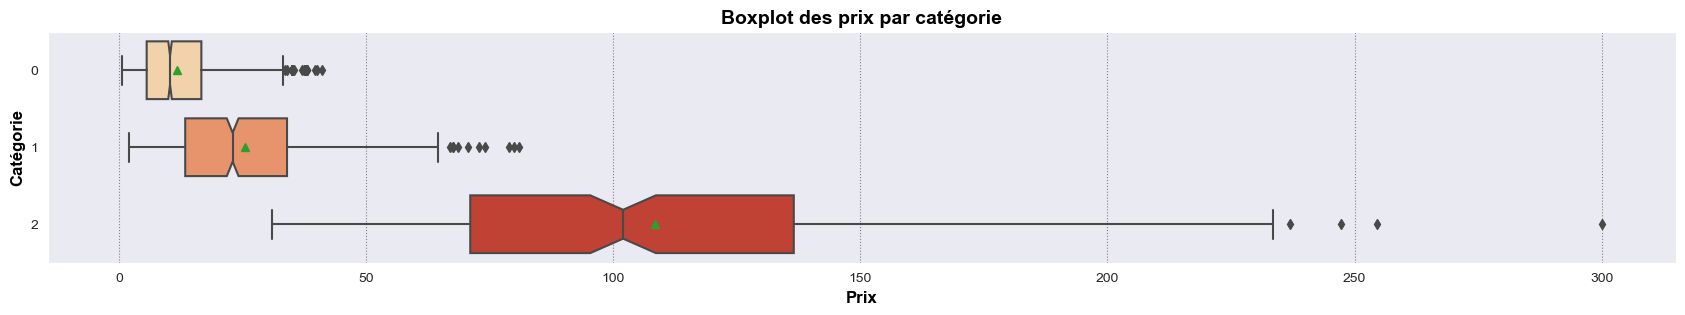

In [67]:
# Boxplot sur les prix par catégorie, sur le df_products donc celui qui contient un produit avec un prix négatif
# On voit que pour la catégorie 0 les prix sont asser rapprocher, on peux regarder de plus près en ne prenant pas les outliers en compte pour faire une moyenne
# On remarque une grosse disparitée sur les produits de catégorie 2
plt.figure(figsize = (21,3)) # C'est bien d'avoir un écran 21:9 ^^
# sns.set(style = 'darkgrid')
sns.boxplot(data = df_products, y = 'categ', x = 'price', orient = 'h', width = 0.75, showmeans = True, palette = 'OrRd', notch=True)

plt.title('Boxplot des prix par catégorie', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Prix', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Catégorie', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

In [68]:
# On  remplace donc le prix manquant par la médiane soit 10.32€
# On modifie sa catégorie par ce que l'on a constaté avant, soit categ = 0
# Le remplacement est fait dans df_spc afin de ne pas devoir relancer toute la partie précédente et montrer la méthode employée
df_spc['price'].replace(np.nan, 10.32, inplace = True) # Remplacement des NaN pas le prix défini
df_spc['categ'].replace(np.nan, int(0), inplace = True) # Remplacement des NaN pas la catégorie
df_spc.loc[df_spc['id_prod'] == '0_2245']
# Le message d'erreur on le regarde pas, il est juste pas content de ce que je fais et ça marche quand même


C:\Users\david\AppData\Local\Temp\ipykernel_21244\1660558436.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spc['price'].replace(np.nan, 10.32, inplace = True) # Remplacement des NaN pas le prix défini
C:\Users\david\AppData\Local\Temp\ipykernel_21244\1660558436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spc['categ'].replace(np.nan, int(0), inplace = True) # Remplacement des NaN pas la catégorie


,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
37861,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,10.32,0.0,left_only,f,1968.0,55.0,both
37862,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,10.32,0.0,left_only,f,1968.0,55.0,both
37863,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,10.32,0.0,left_only,f,1968.0,55.0,both
37864,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,10.32,0.0,left_only,f,1968.0,55.0,both
37865,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,10.32,0.0,left_only,f,1968.0,55.0,both
...,...,...,...,...,...,...,...,...,...,...,...
654934,0_2245,2021-09-07 20:55:19.719028,s_86505,c_8153,10.32,0.0,left_only,f,1975.0,48.0,both
656406,0_2245,2021-10-20 13:11:05.671456,s_107564,c_1746,10.32,0.0,left_only,m,1994.0,29.0,both
660365,0_2245,2021-04-10 06:15:32.619826,s_18510,c_277,10.32,0.0,left_only,f,2000.0,23.0,both
660366,0_2245,2022-04-10 06:15:32.619826,s_191872,c_277,10.32,0.0,left_only,f,2000.0,23.0,both


In [69]:
# Petite vérif pour voir si il y a encore des données manquantes
df_spc.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
indic_1       0
sex           0
birth         0
age           0
indic_2       0
dtype: int64

In [70]:
# On rajoute ce produits dans le df_products car il n'y figure pas
# On rajoute à la fin du df et on reset l'index
df_products.loc[-1]=[ '0_2245', 10.32, 0 ]
df_products = df_products.reset_index().drop(columns = 'index')

In [71]:
# Vérification que le produit a bien été ajouté
df_products.loc[df_products['id_prod'] == '0_2245']

,id_prod,price,categ
3286,0_2245,10.32,0


##### *3.2.4. Nettoyage des dates (ok)*

In [72]:
# On change le format des dates en yyyy-mm-dd
df_spc['date'] = pd.to_datetime(df_spc['date'], format = '%Y-%m-%d') # Conversion de 'date' en datetime puis dans le format voulu pour faire nos tris
df_spc

# Le message d'erreur on le regarde pas, il est juste pas content de ce que je fais et ça marche quand même, je veux juste garder l'index sans reset pour l'instant

C:\Users\david\AppData\Local\Temp\ipykernel_21244\1338597078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spc['date'] = pd.to_datetime(df_spc['date'], format = '%Y-%m-%d') # Conversion de 'date' en datetime puis dans le format voulu pour faire nos tris


,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986.0,37.0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986.0,37.0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986.0,37.0,both
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986.0,37.0,both
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986.0,37.0,both
...,...,...,...,...,...,...,...,...,...,...,...
679527,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,both,f,2001.0,22.0,both
679528,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,both,f,1960.0,63.0,both
679529,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,both,f,1960.0,63.0,both
679530,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,both,m,1992.0,31.0,both


In [73]:
# Etendue des dates : du 01/03/2021 au 28/02/2023 soit 24 mois
df_spc['date'].describe(datetime_is_numeric=True)

count                           679332
mean     2022-03-03 15:13:19.307389952
min         2021-03-01 00:01:07.843138
25%      2021-09-08 09:14:25.055994368
50%      2022-03-03 07:50:20.817730560
75%      2022-08-30 23:57:08.555173888
max         2023-02-28 23:58:30.792755
Name: date, dtype: object

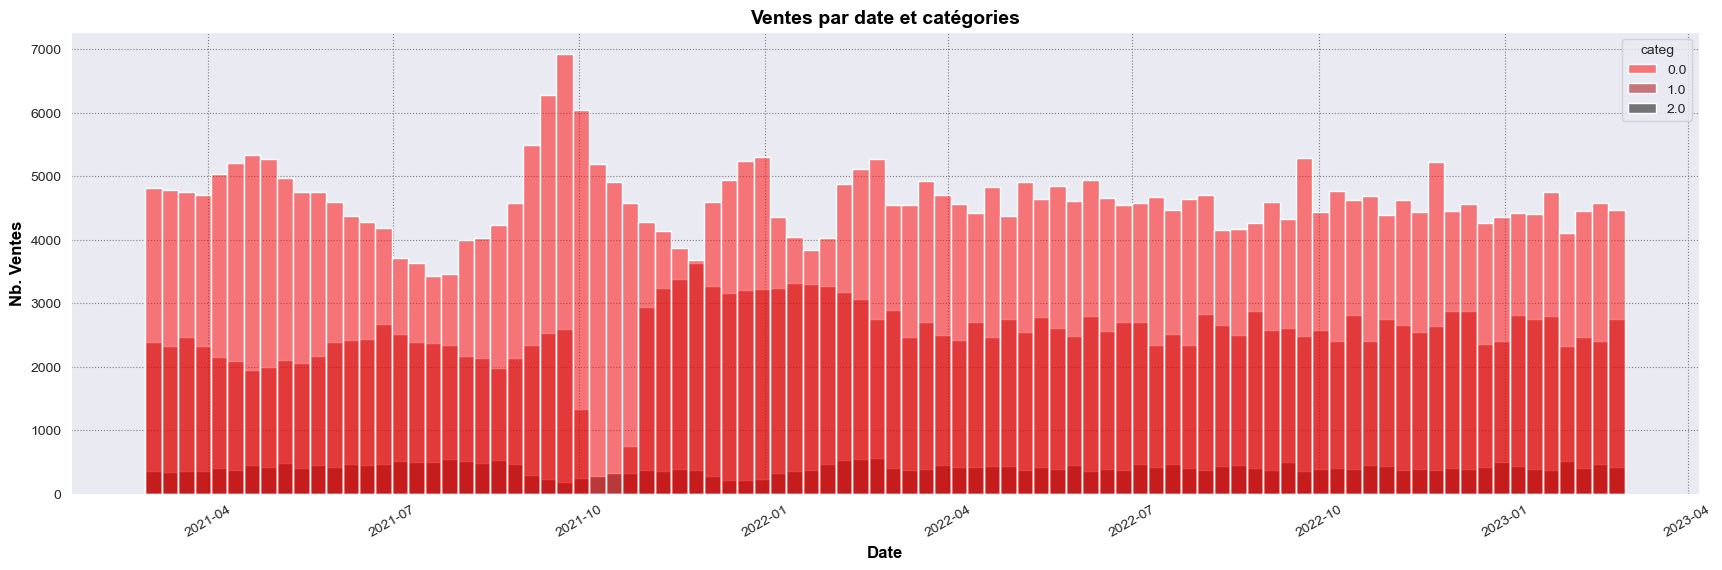

In [74]:
# On fait une visu des ventes par dates par catégories pour voir si il y a des manques de données
# On se basse sur le nombre de ventes par catégories par date
plt.figure(figsize = (21,6))
sns.histplot(data = df_spc, x = 'date', hue = 'categ', palette = 'flag')

plt.title('Ventes par date et catégories', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Date', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Nb. Ventes', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.xticks(rotation=30)

plt.show()

In [75]:
# On vois que pour la catégorie 1 il nous manque des ventes durant une période
# On regarder plus précisement cette période, on prendra entre octobre 2021 et novembre 2021 pour faire un zoom dessus, on affine pour voir début et fin de cette période sur cette catégorie
df_date_c1 = df_spc.loc[(df_spc['date'] >= '2021-10-01') & (df_spc['date'] < '2021-11-01') & (df_spc['categ'] == 1)].copy()
df_date_tot = df_spc.loc[(df_spc['date'] >= '2021-10-01') & (df_spc['date'] < '2021-11-01')].copy()
df_date_c1

,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
96,1_249,2021-10-28 07:12:57.082901,s_111235,c_103,22.99,1.0,both,f,1986.0,37.0,both
400,1_366,2021-10-31 03:29:26.732008,s_112546,c_682,28.54,1.0,both,f,1974.0,49.0,both
482,1_343,2021-10-28 03:08:20.379435,s_111160,c_682,27.99,1.0,both,f,1974.0,49.0,both
846,1_395,2021-10-30 11:44:29.472147,s_112260,c_7217,28.99,1.0,both,f,1976.0,47.0,both
1566,1_466,2021-10-28 12:40:12.728488,s_111330,c_4377,15.81,1.0,both,m,1975.0,48.0,both
...,...,...,...,...,...,...,...,...,...,...,...
676121,1_388,2021-10-31 02:08:17.584759,s_112518,c_6779,16.70,1.0,both,m,1995.0,28.0,both
677248,1_274,2021-10-01 02:49:47.820561,s_98236,c_2866,24.40,1.0,both,f,1992.0,31.0,both
677400,1_639,2021-10-28 17:44:14.325576,s_111419,c_223,10.99,1.0,both,f,1968.0,55.0,both
678382,1_296,2021-10-31 09:25:15.386659,s_112669,c_1828,24.67,1.0,both,m,2004.0,19.0,both


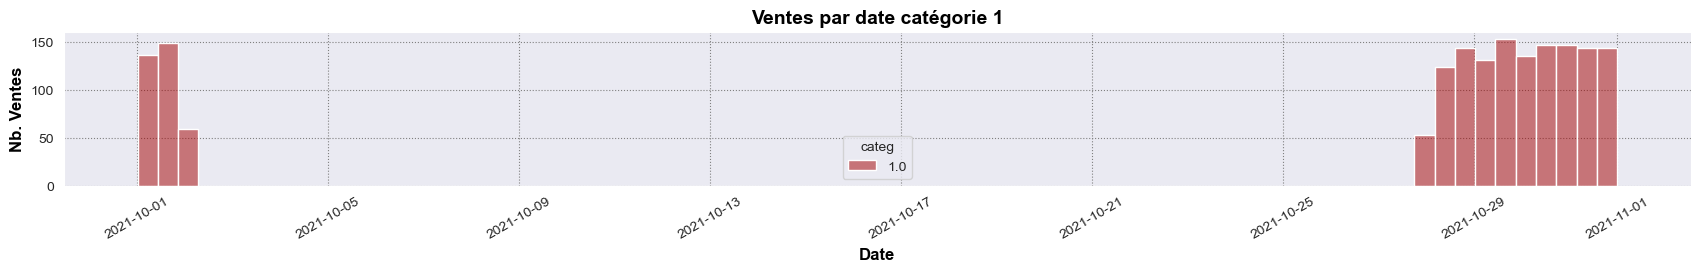

In [76]:
# On fait un visu des ventes poue la catégorie 1 en zoomant sur cette période pour affiner
# Je pourrais réduire cette fenêtre pour être au plus proche mais aussi voir l'impact de ce "manque" sur les données si l'on supprimait celle ci ou toutes les ventes de cette période
# On vois que l'on a quand même des ventes en début et en fin de mois aux alentours du 01/10 et du 28/10...
plt.figure(figsize = (21, 2))
sns.histplot(data = df_date_c1, x = 'date', hue = 'categ', palette = 'flag')

plt.title('Ventes par date catégorie 1', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Date', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Nb. Ventes', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.xticks(rotation=30)

plt.show()

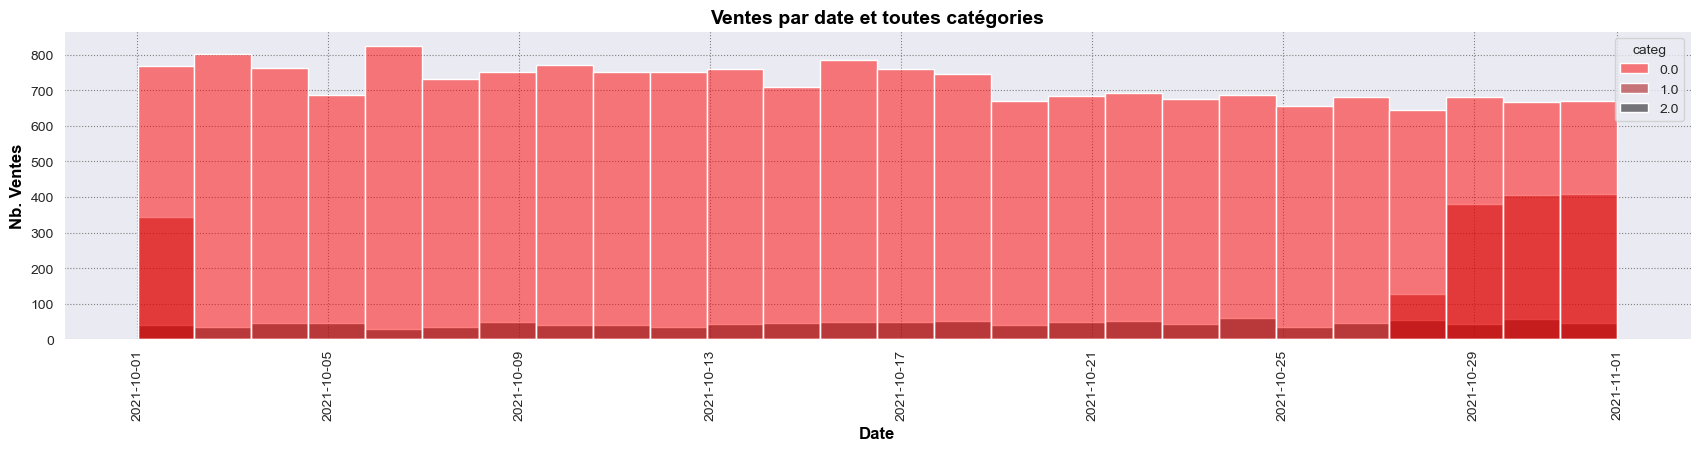

In [77]:
# On fait un visu des ventes de toutes les catégories sur cette période pour affiner
plt.figure(figsize = (21, 4))
sns.histplot(data = df_date_tot, x = 'date', hue = 'categ', palette = 'flag')

plt.title('Ventes par date et toutes catégories', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Date', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Nb. Ventes', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.xticks(rotation=90)

plt.show()

In [78]:
# On regarde à présent ce que cela représente comparé à l'étendue du  dataset entier
print('Ventes durant cette période de la catégorie 1 :', len(df_date_c1))
print('Ventes durant cette période toutes catégories :', len(df_date_tot))
print('Ventes au global :', len(df_spc))

Ventes durant cette période de la catégorie 1 : 1666
Ventes durant cette période toutes catégories : 21606
Ventes au global : 679332


In [79]:
# Proportion du df dela période ou il nous manque des ventes en catégorie 1 (on prend tout le mois d'octobre)
# Pour équilibrer notre analyse on supprimera toutes les ventes durant cette période, càd le mois d'octobre, cela fera un mois "vide" plutôt de prendre le peu de données dispos
print('Octobre représente :', round((len(df_date_tot)*100)/len(df_spc), 2), '% du dataset entier')

Octobre représente : 3.18 % du dataset entier


In [80]:
# Suppression du mois d'octobre
df_spc.drop(df_date_tot.index, inplace = True)

C:\Users\david\AppData\Local\Temp\ipykernel_21244\3938365764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spc.drop(df_date_tot.index, inplace = True)


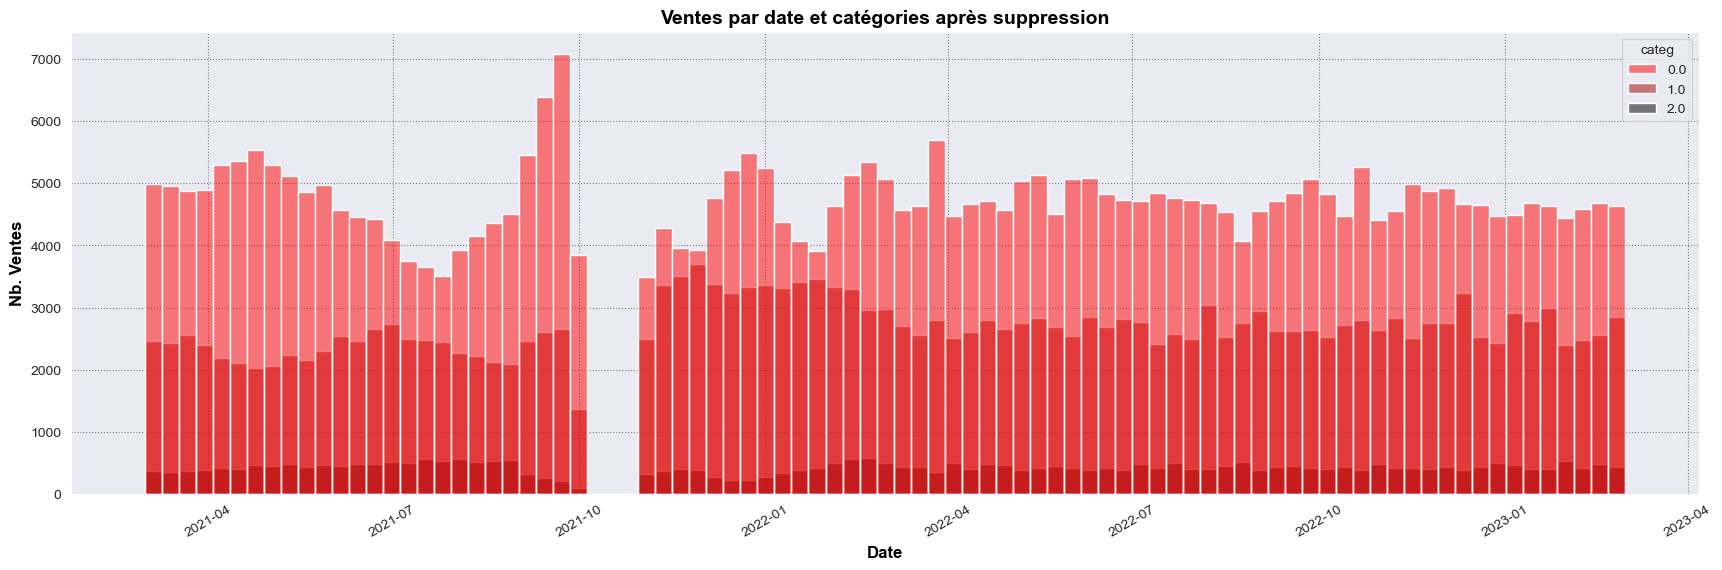

In [81]:
# On fait une visu des ventes par dates par catégories après suppresion du mois d'octobre
plt.figure(figsize = (21,6))
sns.histplot(data = df_spc, x = 'date', hue = 'categ', palette = 'flag')

plt.title('Ventes par date et catégories après suppression', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Date', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Nb. Ventes', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.xticks(rotation=30)

plt.show()

In [82]:
# Comptage nettoyage
print('Nombre de ventes à supprimer :', len(df_date_tot))
print('Longueur du df après suppression de', len(df_date_tot), 'lignes :', len(df_spc))
print('Longueur du df original :', len_df_orig)
print('Nombre de lignes déjà traitées :', len_df_orig-len(df_spc))

Nombre de ventes à supprimer : 21606
Longueur du df après suppression de 21606 lignes : 657726
Longueur du df original : 679574
Nombre de lignes déjà traitées : 21848


##### *3.2.5. Données supplémentaires (ok)*

In [83]:
# Ajout de quelques colonnes supplémentaires qui pourront êtres utiles pour notre analyse

    # Ajout de l'age (ok)
    # Tranche d'age (ok)
    # Recherche de clients grand comptes (on récupèrera leurs id_client) (ok)
    # Le mois de transaction et l'année (ok)

In [84]:
# On regarde déjà ce que l'on à dans notre df nettoyé
df_spc.describe(include = 'all', datetime_is_numeric=True)

,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2
count,657726,657726,657726,657726,657726.000000,657726.000000,657726,657726,657726.000000,657726.000000,657726
unique,3264,NaN,330769,8598,NaN,NaN,2,2,NaN,NaN,1
top,1_369,NaN,s_118668,c_1609,NaN,NaN,both,m,NaN,NaN,both
freq,2237,NaN,14,24472,NaN,NaN,657512,329819,NaN,NaN,657726
mean,NaN,2022-03-08 03:57:35.904075520,NaN,NaN,17.537909,0.450229,NaN,NaN,1977.776571,45.223429,NaN
min,NaN,2021-03-01 00:01:07.843138,NaN,NaN,0.620000,0.000000,NaN,NaN,1929.000000,19.000000,NaN
25%,NaN,2021-09-02 21:01:31.640167680,NaN,NaN,8.990000,0.000000,NaN,NaN,1970.000000,36.000000,NaN
50%,NaN,2022-03-14 23:10:53.822161408,NaN,NaN,13.990000,0.000000,NaN,NaN,1980.000000,43.000000,NaN
75%,NaN,2022-09-05 21:28:50.357491200,NaN,NaN,19.080000,1.000000,NaN,NaN,1987.000000,53.000000,NaN
max,NaN,2023-02-28 23:58:30.792755,NaN,NaN,300.000000,2.000000,NaN,NaN,2004.000000,94.000000,NaN


In [85]:
# Ajout d'une tranche d'age des clients
# Age minimum 19 - age maximum 94, par tranche de 10 ans
def tranche_age(row):
    age = row['age'] # On récupère l'age et on test pour retourner une tranche d'age
    if age <= 30:
        rep = '18-30'
    elif age <= 40:
        rep = '30-40'
    elif age <= 50:
        rep = '40-50'
    elif age <= 60:
        rep = '50-60'
    elif age <= 70:
        rep = '60-70'
    elif age <= 80:
        rep = '70-80'
    else:
        rep = '>80'
    return rep # On retourne la tranche d'age

df_spc['classe_age'] = df_spc.apply(tranche_age, axis = 1)
df_spc

C:\Users\david\AppData\Local\Temp\ipykernel_21244\2689917337.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spc['classe_age'] = df_spc.apply(tranche_age, axis = 1)


,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2,classe_age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986.0,37.0,both,30-40
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986.0,37.0,both,30-40
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986.0,37.0,both,30-40
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986.0,37.0,both,30-40
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986.0,37.0,both,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...
679527,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,both,f,2001.0,22.0,both,18-30
679528,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,both,f,1960.0,63.0,both,60-70
679529,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,both,f,1960.0,63.0,both,60-70
679530,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,both,m,1992.0,31.0,both,30-40


In [86]:
# On regarde si l'on a de gros acheteurs, acheteurs buisness ?
# On compte le nombre de fois ou les clients apparaissent dans les ventes
# Classement par client qui ont passés le plus de commandes
df_spc.groupby(['client_id']).agg({'date': 'count'}).reset_index().sort_values(by = 'date', ascending = False).head()

,client_id,date
677,c_1609,24472
6336,c_6714,8903
2723,c_3454,6635
4387,c_4958,5090
2513,c_3263,392


In [87]:
# On stockera ces client_id pour plus tard
# On a 4 client qui on passés plus de 5000 commandes, on recupère leurs id et on les stock pour plus tard
gr_cpt = df_spc.groupby(['client_id']).agg({'date': 'count'}).reset_index().sort_values(by = 'date', ascending = False)['client_id'].to_list()
gr_cpt = gr_cpt[0:4]
gr_cpt

['c_1609', 'c_6714', 'c_3454', 'c_4958']

In [88]:
# On ajoute deux colonnes, une avec le mois et l'autre avec l'année
df_spc['day'] = pd.DatetimeIndex(df_spc['date']).day # Jour du mois
df_spc['month'] = pd.DatetimeIndex(df_spc['date']).month # Mois, de 1 à 12
df_spc['year'] = pd.DatetimeIndex(df_spc['date']).year # Année
df_spc

#  Le message d'erreur c'est parce que je n'ai pas fais de reset_index() avant, donc c'est normal que ça rale, je ferais un reset_index() une fois mon traitement terminé

C:\Users\david\AppData\Local\Temp\ipykernel_21244\4141539386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spc['day'] = pd.DatetimeIndex(df_spc['date']).day # Jour du mois
C:\Users\david\AppData\Local\Temp\ipykernel_21244\4141539386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spc['month'] = pd.DatetimeIndex(df_spc['date']).month # Mois, de 1 à 12
C:\Users\david\AppData\Local\Temp\ipykernel_21244\4141539386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,id_prod,date,session_id,client_id,price,categ,indic_1,sex,birth,age,indic_2,classe_age,day,month,year
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986.0,37.0,both,30-40,20,5,2022
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986.0,37.0,both,30-40,20,7,2021
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986.0,37.0,both,30-40,20,8,2022
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986.0,37.0,both,30-40,18,6,2022
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986.0,37.0,both,30-40,18,8,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679527,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,both,f,2001.0,22.0,both,18-30,23,7,2021
679528,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,both,f,1960.0,63.0,both,60-70,25,3,2022
679529,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,both,f,1960.0,63.0,both,60-70,25,9,2021
679530,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,both,m,1992.0,31.0,both,30-40,11,3,2021


##### *3.2.6. Check du nettoyage (ok)*

In [89]:
# On vérifie certaines dimmensions du df nettoyé, ainsi que les doublons et autres pour voir si il n'y a pas d'outliers ou d'abérations
# On vire aussi les colonnes qui ne servent plus comme les indic de merge
# Eventuellement un mapping pour du rename de colonnes si besoin et un repositionnement de l'ordre des colonnes
# On restera l'index également après avoir mis les dates par ordre chronologique

In [90]:
# On supprime les deux colonnes d'indicateur des merge et on fait aussi un reset_index()
df_spc = df_spc.sort_values(by = 'date') # On trie toute les dates par ordre croissant
df_spc = df_spc.reset_index().drop(columns = ['index', 'indic_1', 'indic_2']).copy()  # Reset de l'index et on vire la colonne qui est crée pour garder l'ancien index
df_spc

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age,day,month,year
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,f,1967.0,56.0,50-60,1,3,2021
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960.0,63.0,60-70,1,3,2021
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988.0,35.0,30-40,1,3,2021
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989.0,34.0,30-40,1,3,2021
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956.0,67.0,60-70,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
657721,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,21.92,1.0,f,1996.0,27.0,18-30,28,2,2023
657722,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,48.99,2.0,f,1994.0,29.0,18-30,28,2,2023
657723,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,26.99,1.0,f,1985.0,38.0,30-40,28,2,2023
657724,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,8.99,0.0,m,1953.0,70.0,60-70,28,2,2023


In [91]:
# Vérification des doublons éventuels
df_spc.value_counts(dropna = False, ascending = False)

id_prod  date                        session_id  client_id  price  categ  sex  birth   age   classe_age  day  month  year
0_0      2021-03-01 13:45:51.575117  s_282       c_5152     3.75   0.0    f    1986.0  37.0  30-40       1    3      2021    1
1_293    2022-07-16 17:33:04.474032  s_239315    c_4319     22.99  1.0    m    1955.0  68.0  60-70       16   7      2022    1
         2022-05-30 15:36:23.214119  s_216406    c_4376     22.99  1.0    f    1963.0  60.0  50-60       30   5      2022    1
         2022-06-02 08:29:12.847705  s_217636    c_550      22.99  1.0    f    1969.0  54.0  50-60       2    6      2022    1
         2022-06-06 01:38:49.564266  s_219413    c_4871     22.99  1.0    f    1987.0  36.0  30-40       6    6      2022    1
                                                                                                                            ..
0_1490   2022-12-31 05:53:18.359806  s_319809    c_7600     10.40  0.0    f    1957.0  66.0  60-70       31   12    

---
## Partie 2 - Indicateurs de ventes

### *1. Quelques informations sur les produits et clients (ok)*
---

In [92]:
# On regarde pour commencer certaines données sur ce que l'on vend

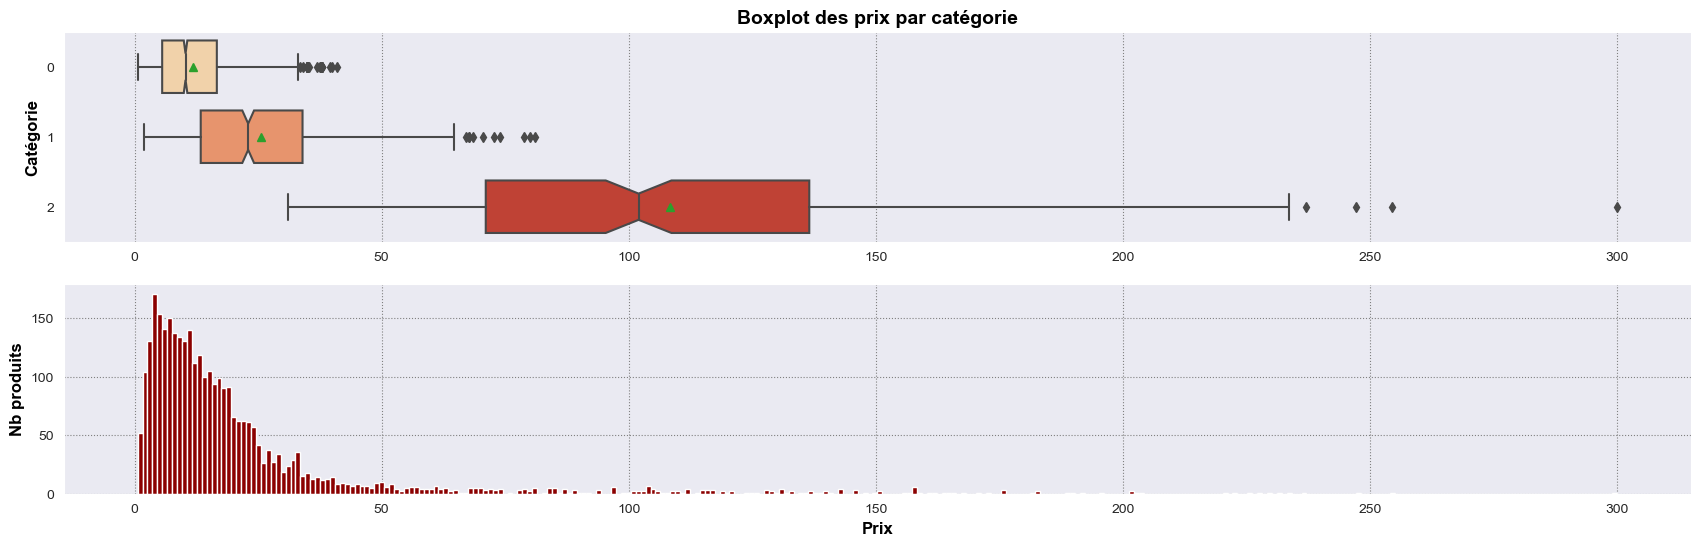

In [93]:
# Boxplot sur les prix par catégorie, sur le df_products
# On remarque une grosse disparitée sur les produits de catégorie 2

plt.figure(figsize = (21,6)) # C'est bien d'avoir un écran 21:9 ^^

plt.subplot(211) # Boxplot sur les prix

sns.boxplot(data = df_products, y = 'categ', x = 'price', orient = 'h', width = 0.75, showmeans = True, palette = 'OrRd', notch=True)
plt.title('Boxplot des prix par catégorie', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Catégorie', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.subplot(212) # Hist sur les prix

# Histogramme de la répartition des prix des produits toutes catégorie confondues (par tranche de 1, min = 0, max = 300)

plt.hist(x = df_products['price'], bins = 300, color = 'Darkred')
plt.xlabel('Prix', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Nb produits', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

In [94]:
df_customers.describe()

,birth,age
count,8621.000000,8621.000000
mean,1978.275606,44.724394
std,16.917958,16.917958
min,1929.000000,19.000000
25%,1966.000000,31.000000
50%,1979.000000,44.000000
75%,1992.000000,57.000000
max,2004.000000,94.000000


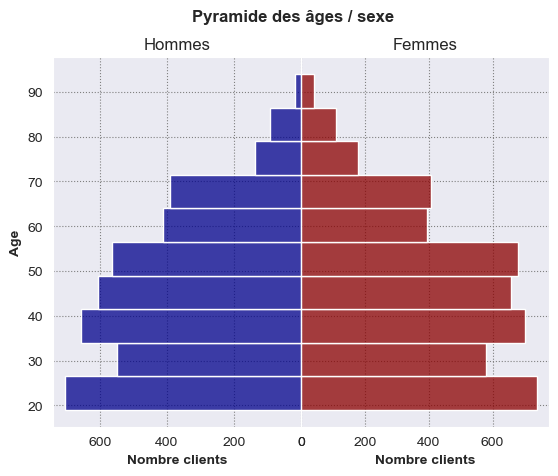

In [95]:
# Age et sexe des clients
# Voir répartition en age et sexe, graphe pyramide en vertical sur le df client pour voir le nombre d'h/f et l'age (min 19 ans, max 94 ans)
# On fait des bins de 10 pour coller à notre fonction de tranches d'age
fig, axes = plt.subplots(1, 2)
fig.suptitle('Pyramide des âges / sexe', fontweight = 'bold')

sns.histplot(ax=axes[0], y=df_customers[df_customers['sex']=='m']['age'], bins=10, color = 'Darkblue') # On fait un hist horizontale du nombre de ventes par homme
axes[0].invert_xaxis() # On fait le graphe sur axe négatif
# axes[0].set_yticklabels([]) # On enlève les label sur les barres, si on le  met on a pas de visu des ages
axes[0].set_xlabel('Nombre clients', fontweight = 'bold')
axes[0].set_ylabel('Age', fontweight = 'bold') # On met le label sur le premier graph de gauche
axes[0].set_title('Hommes')

sns.histplot(ax=axes[1], y=df_customers[df_customers['sex']=='f']['age'], bins=10, color= 'Darkred') # On fait un hist horizontale du nombre de ventes par femme
axes[1].set_yticklabels([]) # On enlève les label sur les barres
axes[1].set_xlabel('Nombre clients', fontweight = 'bold')
axes[1].set_ylabel('') # On ne veux pas de label y sur ce graphe
axes[1].set_title('Femmes')

plt.subplots_adjust(wspace=0, hspace=0) # On colle les deux graphes

plt.show()

In [96]:
# Regarder la répartition des ventes entre homme et femme

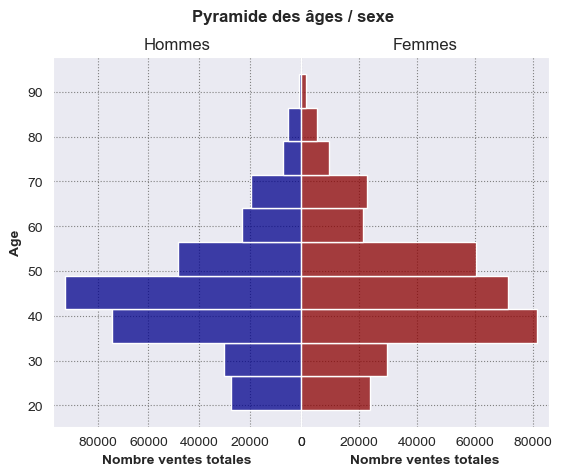

In [97]:
# Age et sexe des clients
# Voir répartition en age et sexe, graphe pyramide en vertical sur le df global
fig, axes = plt.subplots(1, 2)
fig.suptitle('Pyramide des âges / sexe', fontweight = 'bold')

sns.histplot(ax=axes[0], y=df_spc[df_spc['sex']=='m']['age'], bins=10, color = 'Darkblue') # On fait un hist horizontale du nombre de ventes par homme (prend le nombre de fois ou apparait le même age)
axes[0].invert_xaxis() # On fait le graphe sur axe négatif
# axes[0].set_yticklabels([]) # On enlève les label sur les barres, si on le  met on a pas de visu des ages
axes[0].set_xlabel('Nombre ventes totales', fontweight = 'bold')
axes[0].set_ylabel('Age', fontweight = 'bold') # On met le label sur le premier graph de gauche
axes[0].set_title('Hommes')

sns.histplot(ax=axes[1], y=df_spc[df_spc['sex']=='f']['age'], bins=10, color= 'Darkred') # On fait un hist horizontale du nombre de ventes par femme
axes[1].set_yticklabels([]) # On enlève les label sur les barres
axes[1].set_xlabel('Nombre ventes totales', fontweight = 'bold')
axes[1].set_ylabel('') # On ne veux pas de label y sur ce graphe
axes[1].set_title('Femmes')

plt.subplots_adjust(wspace=0, hspace=0) # On colle les deux graphes

plt.show()

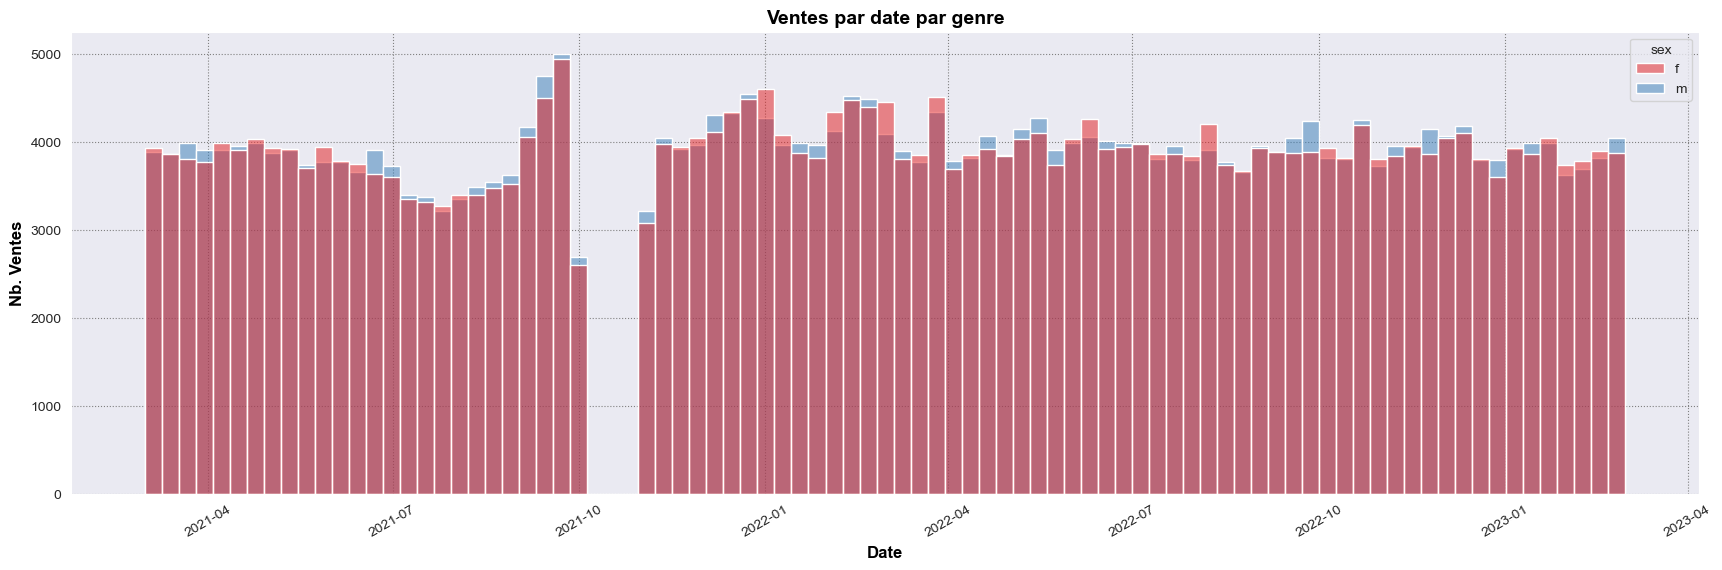

In [98]:
# On fait une visu des ventes par dates par genre de client
plt.figure(figsize = (21,6))
sns.histplot(data = df_spc, x = 'date', hue = 'sex', palette = 'Set1')

plt.title('Ventes par date par genre', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Date', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Nb. Ventes', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.xticks(rotation=30)

plt.show()

#### *1.1. Clients pro (ok)*

In [99]:
# Plus gros acheteurs, liste des grands comptes
# liste générée lors de l'exploration/netoyage du df final
print('Id client grands comptes :', ' '.join(gr_cpt), '(> 5000 achats total)')

Id client grands comptes : c_1609 c_6714 c_3454 c_4958 (> 5000 achats total)


In [100]:
# Volume d'achat
# CA entre B2B et B2C
# Juste pour comparer l'impact possible des B2B sur l'analyse que l'on veux plus ciblée sur les clients B2C

In [101]:
# Données sur les clients B2B, on les sépare dans deux df différents
df_spc_b2b = df_spc.loc[df_spc['client_id'].isin(gr_cpt)]
df_spc_b2b.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age,day,month,year
6,0_1304,2021-03-01 00:07:04.371179,s_7,c_1609,5.86,0.0,m,1980.0,43.0,40-50,1,3,2021
14,0_1159,2021-03-01 00:11:57.832228,s_7,c_1609,7.99,0.0,m,1980.0,43.0,40-50,1,3,2021
51,0_1431,2021-03-01 01:08:49.803921,s_33,c_3454,10.99,0.0,m,1969.0,54.0,50-60,1,3,2021
79,0_1425,2021-03-01 01:56:41.944044,s_46,c_1609,12.99,0.0,m,1980.0,43.0,40-50,1,3,2021
89,0_1469,2021-03-01 02:12:21.294004,s_53,c_1609,14.99,0.0,m,1980.0,43.0,40-50,1,3,2021


In [102]:
# Données sur les clients B2C, on les sépare dans deux df différents
df_spc_b2c = df_spc.loc[~df_spc['client_id'].isin(gr_cpt)]
df_spc_b2c.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age,day,month,year
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,f,1967.0,56.0,50-60,1,3,2021
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960.0,63.0,60-70,1,3,2021
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988.0,35.0,30-40,1,3,2021
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989.0,34.0,30-40,1,3,2021
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956.0,67.0,60-70,1,3,2021


In [103]:
# Nombre de ventes B2B et B2C
# Faire la proportion entre les deux en %, plt.pie
nb_vente_b2b = df_spc_b2b['date'].count()
nb_vente_b2c = df_spc_b2c['date'].count()
print(nb_vente_b2b)
print(nb_vente_b2c)

45100
612626


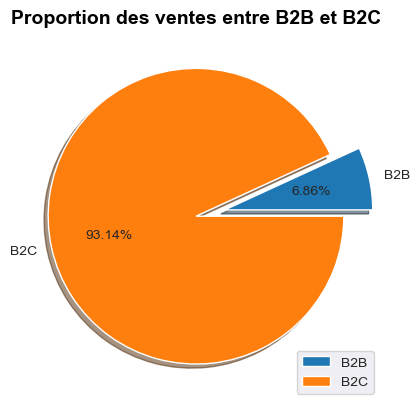

In [104]:
# On regarde les ventes entre B2B et B2C
vente = [nb_vente_b2b, nb_vente_b2c]
label = ['B2B', 'B2C']

plt.pie(vente, autopct = '%1.2f%%', labels=label, explode = (0.2, 0), shadow = True) # Paramètrage du graphe, autopct pour avoir les valeur dans le graphe
plt.legend(loc='lower right')

plt.title('Proportion des ventes entre B2B et B2C', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'}) # Titre du graph
plt.show() #Affichage du graph

In [105]:
# CA B2B et B2C
# Faire la proportion entre les deux en %, plt.pie
ca_vente_b2b = round(df_spc_b2b['price'].sum(), 2)
ca_vente_b2c = round(df_spc_b2c['price'].sum(), 2)
print(ca_vente_b2b)
print(ca_vente_b2c)

857053.03
10678085.39


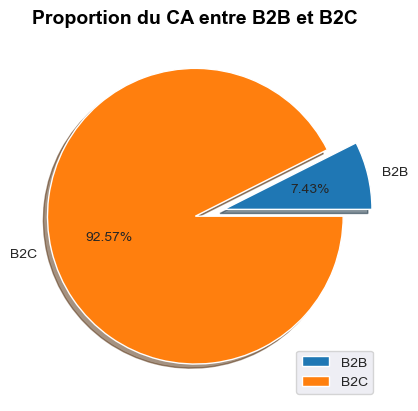

In [106]:
# On regarde le CA entre B2B et B2C
ca = [ca_vente_b2b, ca_vente_b2c]
label = ['B2B', 'B2C']

plt.pie(ca, autopct = '%1.2f%%', labels=label, explode = (0.2, 0), shadow = True) # Paramètrage du graphe, autopct pour avoir les valeur dans le graphe
plt.legend(loc='lower right')

plt.title('Proportion du CA entre B2B et B2C', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'}) # Titre du graph
plt.show() #Affichage du graph

In [107]:
# Quelques infos sur les clients B2B, pour test comment aggréger
df_spc_b2b.groupby(['year', 'month', 'client_id']).agg({'price' : ['sum', 'mean', 'median', 'count', 'min', 'max']}).head(10)

price                                       
                           sum       mean median count    min     max
year month client_id                                                 
2021 3     c_1609     13740.67  12.687599  11.99  1083   0.99   58.54
           c_3454      4513.55  17.426834  16.66   259   3.03   78.83
           c_4958     12073.43  55.129817  49.99   219  10.71  300.00
           c_6714      6194.25  15.761450  13.35   393   1.81  157.42
     4     c_1609     13543.34  12.413694  11.01  1091   1.99   78.83
           c_3454      4485.92  16.312436  15.59   275   0.99   51.92
           c_4958     12503.94  59.827464  57.04   209   7.72  230.04
           c_6714      6269.21  15.633940  13.11   401   2.99  189.99
     5     c_1609     13583.81  11.999832  10.99  1132   0.62   54.73
           c_3454      4610.82  16.705870  15.99   276   3.28   78.83

In [108]:
# La séparation entre ces deux types de clients est faite dans deux df distinct pour la suite de l'analyse
# On regardera l'influence des clients B2B avec une courbe de Lorenz

### *2. Chiffre d'affaire (ok)*
---

In [109]:
# CA par mois tout produits confondus et tout clients
# Voir pour faire un groupby sur le datetime mais par mois et année

In [110]:
# Notre df final nettoyé avec produits clients et ventes
df_spc.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age,day,month,year
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,f,1967.0,56.0,50-60,1,3,2021
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960.0,63.0,60-70,1,3,2021
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988.0,35.0,30-40,1,3,2021
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989.0,34.0,30-40,1,3,2021
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956.0,67.0,60-70,1,3,2021


In [111]:
# Calcul du CA total des données à dispo
df_spc['price'].sum()

11535138.420000002

In [112]:
# On prépare le df pour le CA en passant les dates en index et on resample par mois et en aggrégeant les données
df_ca = df_spc.copy() # On fait une copie du df de base
df_ca = df_ca.set_index(['date']).resample('M').agg({'price' : 'sum'}) # On met les dates en index, on resample par mois et on aggrège
df_ca.head()

,price
date,
2021-03-31,482533.49
2021-04-30,476253.78
2021-05-31,493026.03
2021-06-30,484160.80
2021-07-31,482876.68


In [113]:
# On calcule la moyenne mobile sur des fenêtres de 3 mois sur le prix et on la rajoute dans une colonne
# On défini le calcul sur l'index du df
df_ca['moy_mob'] = df_ca['price'].rolling(3, on = df_ca.index).mean()
df_ca.head(10)

,price,moy_mob
date,,
2021-03-31,482533.49,NaN
2021-04-30,476253.78,NaN
2021-05-31,493026.03,483937.766667
2021-06-30,484160.80,484480.203333
2021-07-31,482876.68,486687.836667
2021-08-31,482377.67,483138.383333
2021-09-30,507364.52,490872.956667
2021-10-31,0.00,329914.063333
2021-11-30,516270.93,341211.816667


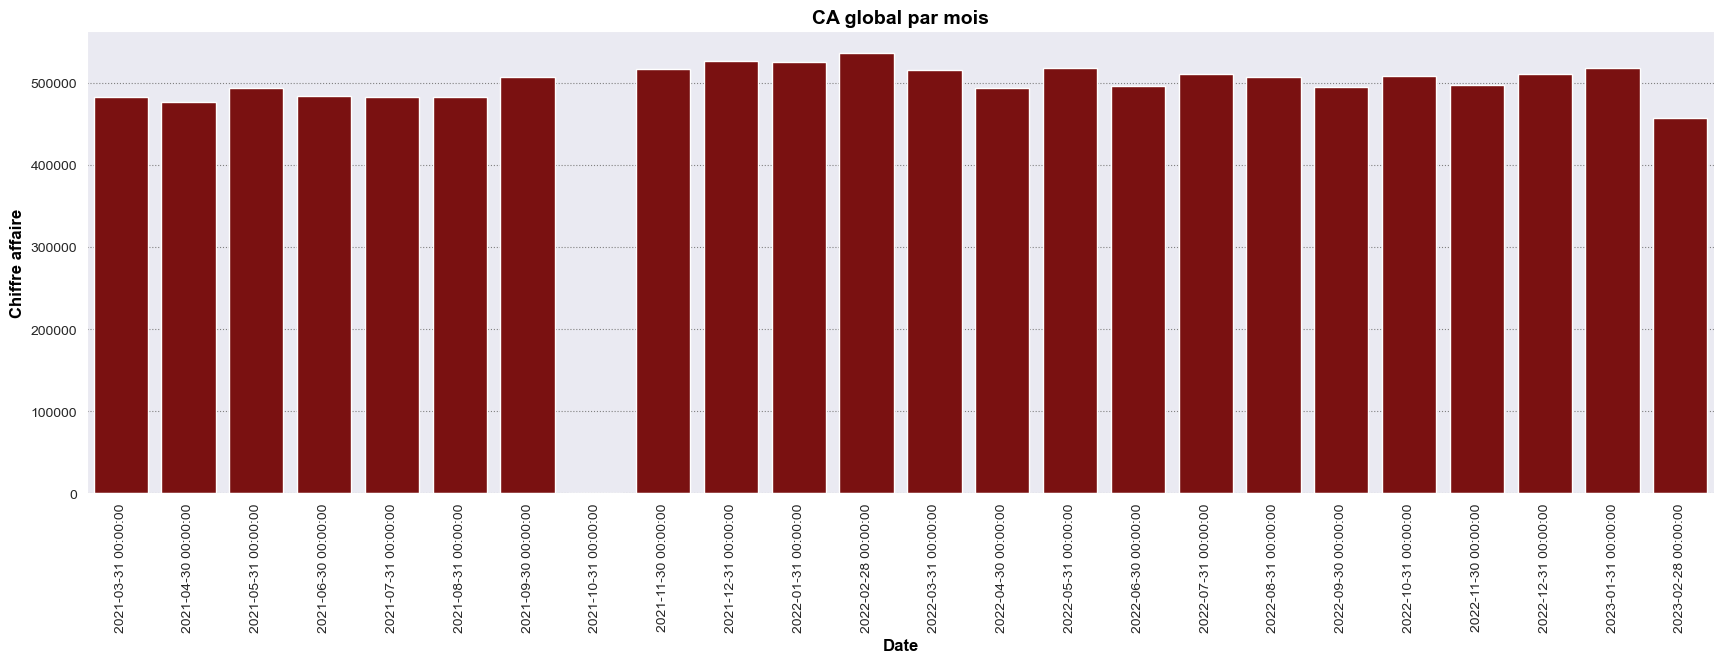

In [114]:
# On fait une visu du CA par mois
plt.figure(figsize = (21,6))
sns.barplot(data = df_ca, x = df_ca.index, y = 'price', color = 'DarkRed')

plt.title('CA global par mois', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Date', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Chiffre affaire', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.xticks(rotation=90)

plt.show()

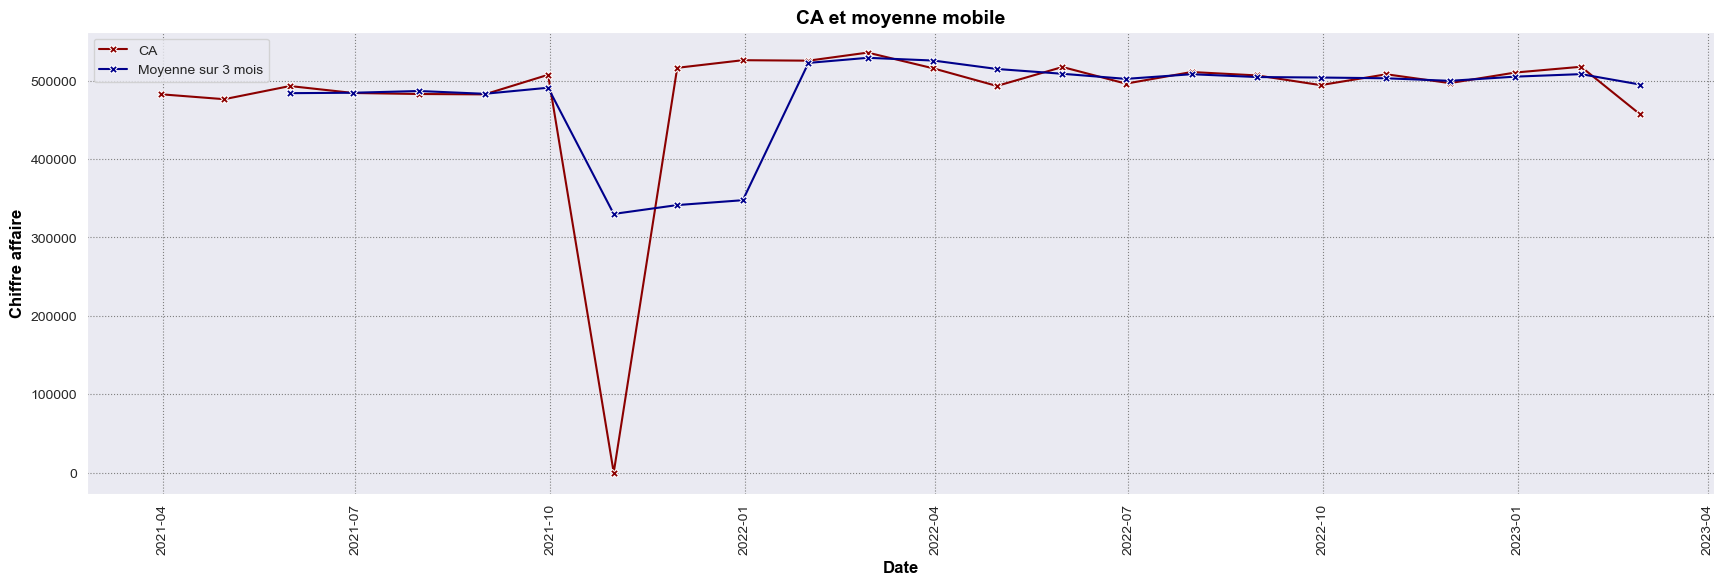

In [115]:
# On fait une visu du CA par mois en lineplot ainsi que de la moyenne mobile
# Trouver un moyn de combiner ces deux graphes
plt.figure(figsize = (21,6))

sns.lineplot(data = df_ca, x = df_ca.index, y = 'price', color = 'DarkRed', marker = 'X')

sns.lineplot(data = df_ca, x = df_ca.index, y = 'moy_mob', marker = 'X', color = 'Darkblue')

plt.title('CA et moyenne mobile', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Date', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Chiffre affaire', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.xticks(rotation=90)
plt.legend(['CA', 'Moyenne sur 3 mois'])

plt.show()

In [116]:
# Préparation pour graphe sur catégories
# Test pour nombre de vente par mois par catégories
# Avec un travail sur les timeline

df_sales_categ = df_spc.set_index('date').copy() # On prend df_spc et on met les dates en index
df_sales_categ = df_sales_categ.resample('M').agg({'categ' : 'value_counts'}) # On resample par mois et on compte les ventes par categ
df_sales_categ = df_sales_categ.rename(columns = {'categ' : 'nb'}).copy() # On renomme categ en nb

# J'ai fait différement qu'un resample pour avoir mes données, je fais des recherches sur les multi_index
df_ca_categ = df_spc.groupby(['year', 'month', 'categ']).agg({'date' : 'min', 'price': 'sum',}).copy() # On fait un df avec le ca par categ par mois, il a les même dimensions que df_sales_categ

df_sales_categ['ca'] = df_ca_categ['price'].values.copy() # On ajoute le ca par categ, les deux df on la même forme

df_sales_categ

nb         ca
date       categ                  
2021-03-31 0.0    18140  193722.05
           1.0     9134  186974.17
           2.0     1336  101837.27
2021-04-30 0.0    19356  205366.94
           1.0     7579  156138.35
...                 ...        ...
2023-01-31 1.0    10252  210104.41
           2.0     1618  126153.08
2023-02-28 0.0    15262  162529.24
           1.0     8789  180347.24
           2.0     1501  113875.52

[69 rows x 2 columns]

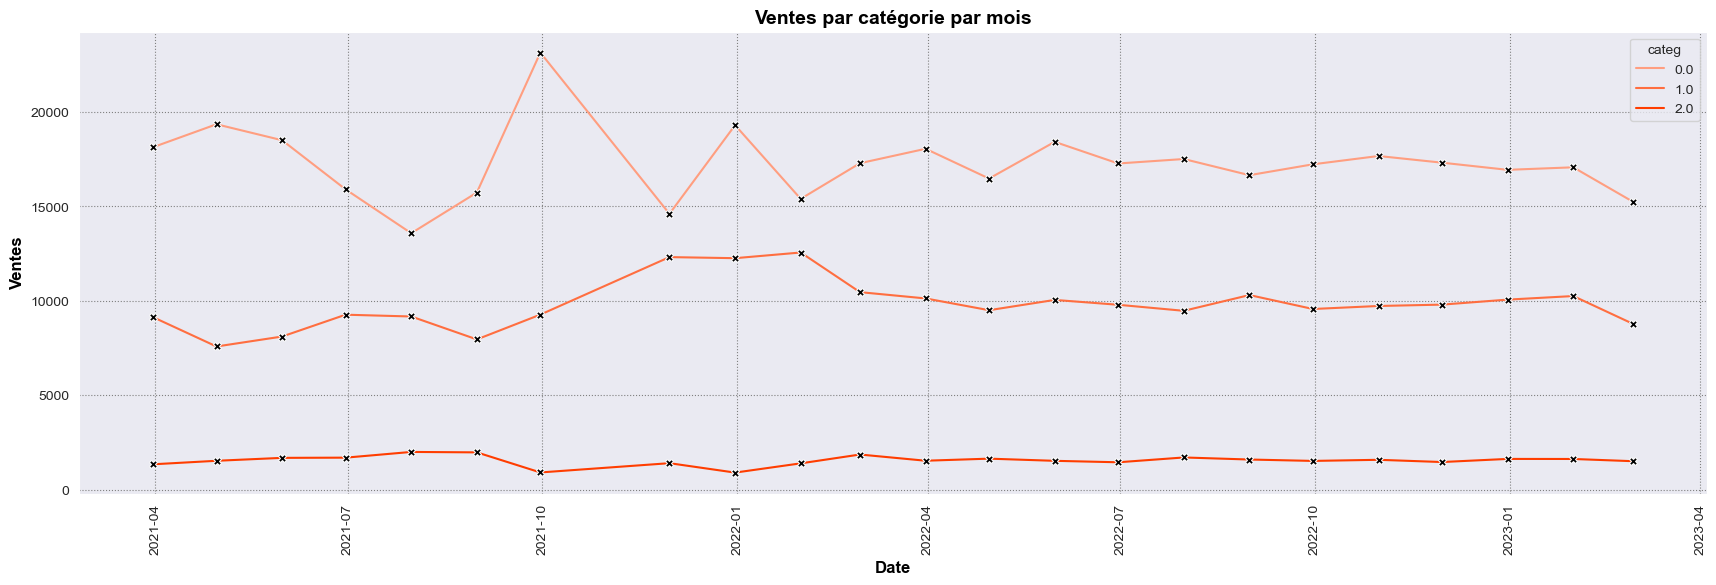

In [117]:
# Visu du nombre de vente par catégories après un resample
plt.figure(figsize = (21,6))
sns.lineplot(data = df_sales_categ, x = 'date', y = 'nb', hue = 'categ', palette=["#ff9e80", "#ff6e40", "#ff3d00"], marker='X', markersize=6, markerfacecolor='black')

plt.title('Ventes par catégorie par mois', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Date', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Ventes', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.xticks(rotation=90)

plt.show()

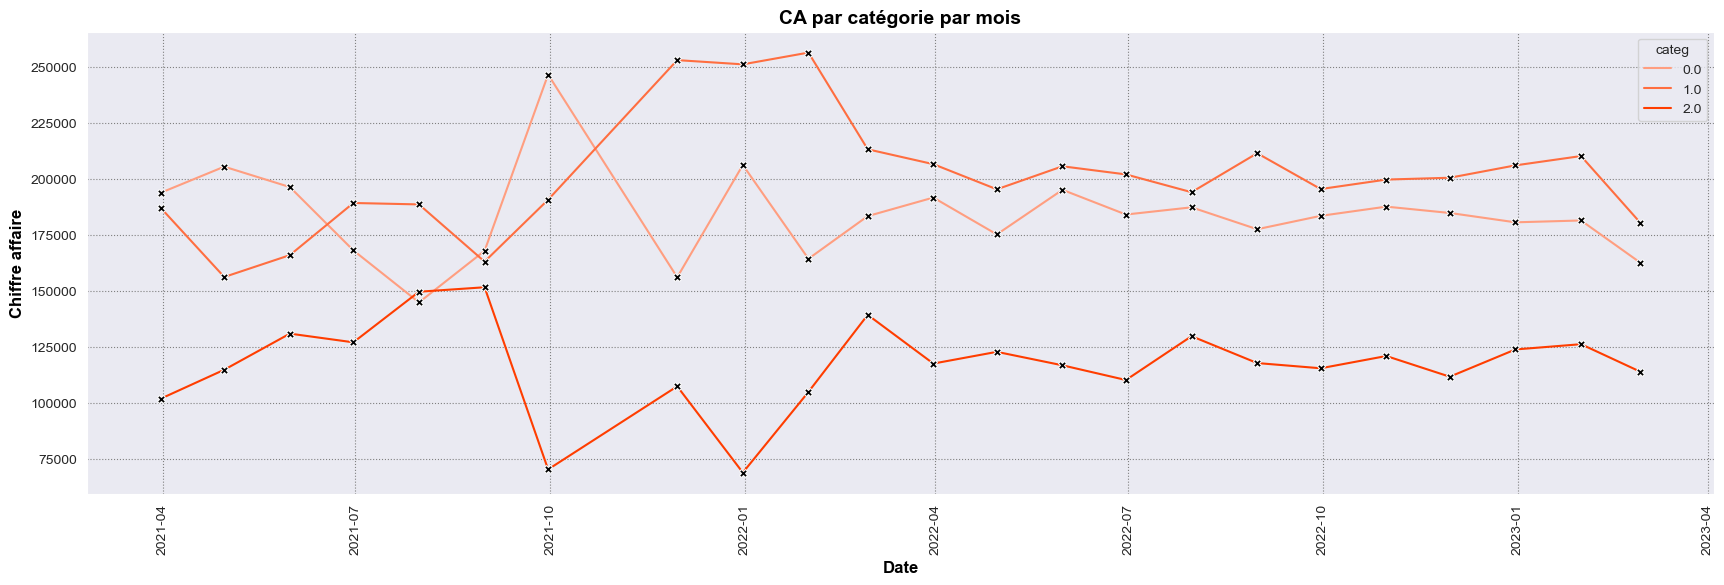

In [118]:
# On fait une visu du CA par mois par catégories
plt.figure(figsize = (21,6))
sns.lineplot(data = df_sales_categ, x = 'date', y = 'ca', hue = 'categ', palette=["#ff9e80", "#ff6e40", "#ff3d00"], marker='X', markersize=6, markerfacecolor='black')

plt.title('CA par catégorie par mois', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Date', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Chiffre affaire', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.xticks(rotation=90)

plt.show()

In [119]:
# Faire un camembert pour la répartition du CA entre les catégories
# On fait une liste du CA par catégorie
t = df_spc.groupby('categ').agg({'price' : 'sum'})['price'].tolist()
t

[4222688.62, 4619960.37, 2692489.43]

{'Categ_0': 4222688.62, 'Categ_1': 4619960.37, 'Categ_2': 2692489.43}
Categ_0    4222688.62
Categ_1    4619960.37
Categ_2    2692489.43
dtype: float64


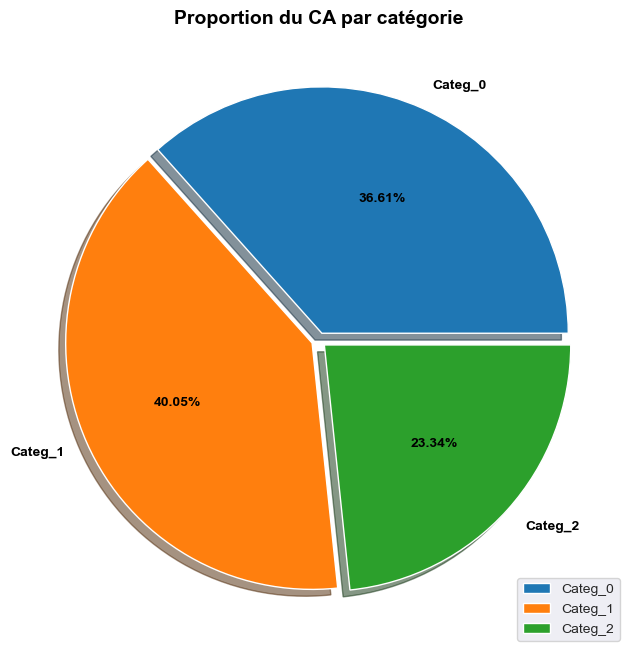

In [120]:
data_dict = dict(zip(['Categ_0', 'Categ_1', 'Categ_2'],  t)) # Mise des données sous  forme de dico
print(data_dict)
data_plot = pd.Series(data_dict)
print(data_plot)

fig, ax = plt.subplots(figsize = (16, 8))

plt.pie(data_plot, autopct = '%1.2f%%', shadow = True, explode = (0.03, 0.03, 0.03), labels = data_plot.index,
        textprops = {'fontsize' : '10', 'color' : 'black', 'fontweight' : 'bold'}) # Paramètrage du graphe, autopct pour avoir les valeur dans le graphe

plt.legend(loc = 'lower right')
plt.title('Proportion du CA par catégorie', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'}) # Titre du graph

plt.show()

#### *2.1. Courbe de Lorenz (ok)*

In [121]:
# Courbe de Lorenz répartition du CA global entre les clients
# Faire un groupby.sum() sur les clients
# Faire avec tout les clients et mettre en avant aussi les grand comptes
# Faire un comparatif de l'indice de Gini avec et sans les grands comptes

In [122]:
# On tri les données pour la courbe de lorenz CA/Clients au global
# A faire avec et sans les grands comptes pour voir la différence
df_ca_client = df_spc.groupby('client_id').agg({'price': 'sum',})
df_ca_client

,price
client_id,
c_1,550.19
c_10,1353.60
c_100,254.85
c_1000,2209.92
c_1001,1720.08
...,...
c_995,189.41
c_996,1611.59
c_997,1432.02


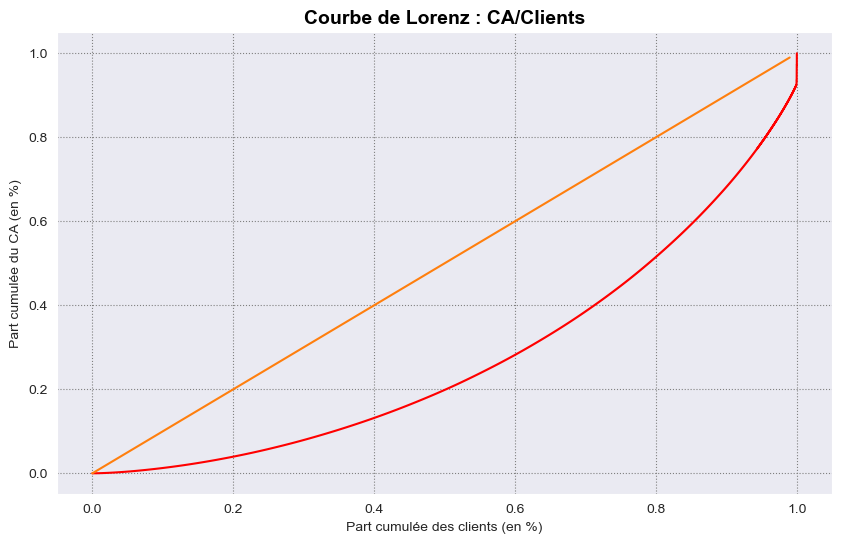

In [123]:
# Courbe de lorenz pour voir la répartition des produits au CA
ca = df_ca_client['price'] # On prend le ca par produit dans une liste

n = len(ca) # On prend la longueur de notre echantillon
lorenz = np.cumsum(np.sort(ca))/ca.sum() # On cumule le ca un par un et on divise par la somme pour arriver à 1, on prend le ca dans l'odre croissant, retourne une liste avec la somme cumulée
lorenz = np.append([0], lorenz) # La courbe de Lorenz commence à 0
  
xaxis = np.linspace(0-1/n, 1+1/n, n+1) # Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n (start, stop, step)

fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(True)
# ax.fill(xaxis, lorenz) # Remplissage par rapport la bissectrice

plt.plot(xaxis, lorenz, drawstyle = 'steps-post', color = 'red')
plt.plot(1, 1)

# Diagonale
a = np.arange(0, 1, .01)
x = a
y = a
    
# Graphique
sns.lineplot(x = x, y = y)

plt.xlabel('Part cumulée des clients (en %)')
plt.ylabel('Part cumulée du CA (en %)')
plt.title('Courbe de Lorenz : CA/Clients', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

In [124]:
# Indice de gini (on vois qu'il n'est pas de 0, donc pas de répartition parfaite)
AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print('Indice de gini :', round(gini, 2))

Indice de gini : 0.45


In [125]:
# On tri les données pour la courbe de lorenz CA/Clients au global
# A faire avec et sans les grands comptes pour voir la différence
# On enlève les 4 gros clients
df_ca_b2c = df_ca_client.iloc[~df_ca_client.index.isin(gr_cpt)].copy()
df_ca_b2c

,price
client_id,
c_1,550.19
c_10,1353.60
c_100,254.85
c_1000,2209.92
c_1001,1720.08
...,...
c_995,189.41
c_996,1611.59
c_997,1432.02


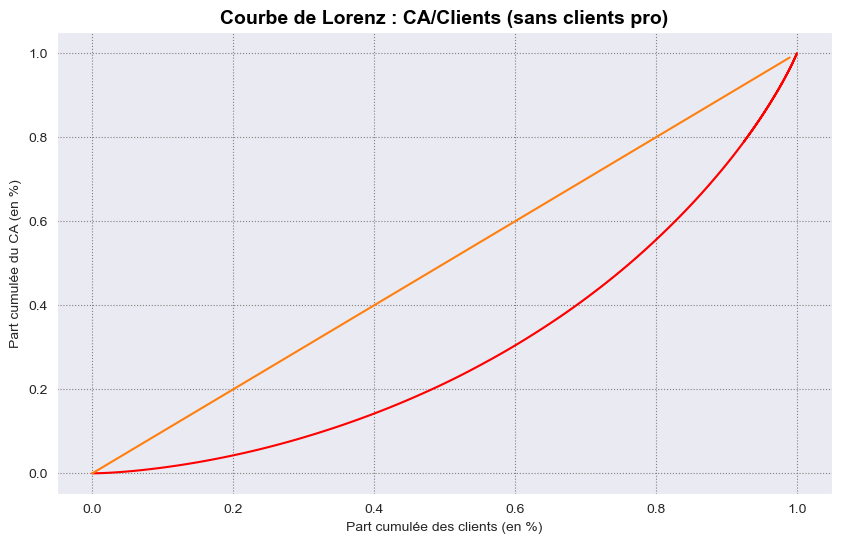

In [126]:
# Courbe de lorenz pour voir la répartition des produits au CA
ca = df_ca_b2c['price'] # On prend le ca par produit dans une liste

n = len(ca) # On prend la longueur de notre echantillon
lorenz = np.cumsum(np.sort(ca))/ca.sum() # On cumule le ca un par un et on divise par la somme pour arriver à 1, on prend le ca dans l'odre croissant, retourne une liste avec la somme cumulée
lorenz = np.append([0], lorenz) # La courbe de Lorenz commence à 0
  
xaxis = np.linspace(0-1/n, 1+1/n, n+1) # Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n (start, stop, step)

fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(True)
# ax.fill(xaxis, lorenz) # Remplissage par rapport la bissectrice

plt.plot(xaxis, lorenz, drawstyle = 'steps-post', color = 'red')
plt.plot(1, 1)

# Diagonale
a = np.arange(0, 1, .01)
x = a
y = a
    
# Graphique
sns.lineplot(x = x, y = y)

plt.xlabel('Part cumulée des clients (en %)')
plt.ylabel('Part cumulée du CA (en %)')
plt.title('Courbe de Lorenz : CA/Clients (sans clients pro)', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

In [127]:
# Indice de gini
AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print('Indice de gini :', round(gini, 2))

Indice de gini : 0.4


In [128]:
# On remarque que les clients B2B risquent de biaiser la suite de notre analyse, on ne prendra que les clients B2C (on le vois sur la courbe de Lorenz)
# On le remarque sur l'indice de gini, 0.4 vs 0.45
# Un rapide tour des clients B2B a été faite précédement
# J'enlève les clients B2B du df final pour ne pas biaiser les analyses, ***cela à déjà été fait en amont***

#### *2.2. Top et Flop (ok)*

In [129]:
# Top et flop des ventes par mois au niveau produits
# Regarder le nombre de ventes mais aussi le CA généré
# On prend les clients B2C sinon risque de biais à cause des clients B2B

In [130]:
# Top 5 des réfs par CA
# Tri par CA avec nombre de ventes
df_spc_b2c.groupby('id_prod').agg({'price' : 'sum', 'date' : 'count'}).sort_values(by = 'price', ascending = False).head(5)

,price,date
id_prod,,
2_159,88615.93,607
2_135,61746.05,895
2_112,56420.95,835
2_102,54113.10,915
1_369,50546.93,2107


In [131]:
# Flop 5 des réfs par CA
# Tri par CA avec nombre de ventes
df_spc_b2c.groupby('id_prod').agg({'price' : 'sum', 'date' : 'count'}).sort_values(by = 'price', ascending = True).head(5)

,price,date
id_prod,,
0_1191,0.99,1
0_1539,0.99,1
0_898,1.27,1
0_1284,1.38,1
0_1653,1.98,2


In [132]:
# Top 5 des réfs par ventes
# Tri par nombre de ventes avec le prix du produit
df_spc_b2c.groupby('id_prod').agg({'price' : 'first', 'date' : 'count'}).sort_values(by = 'date', ascending = False).head(5)

,price,date
id_prod,,
1_369,23.99,2107
1_414,23.83,2035
1_417,20.99,2033
1_498,23.37,1960
1_425,16.99,1951


In [133]:
# Flop 5 des réfs par ventes
# Tri par nombre de ventes avec le prix du produit
df_spc_b2c.groupby('id_prod').agg({'price' : 'first', 'date' : 'count'}).sort_values(by = 'date', ascending = True).head(5)

,price,date
id_prod,,
0_88,8.30,1
2_81,86.99,1
0_1728,2.27,1
2_23,115.99,1
0_1498,2.48,1


In [134]:
# On pourrait pousser plus loin pour voir quels clients sont preneurs

---
## Partie 3 - Recherche de corrélations - Clients B2C

In [135]:
# Poser correctement les hypothèse H0 et H1
# Revoir les dernières lignes de code
# Mise en forme des graphes
# Finaliser les conclusions
# Ecrire la prez en parallèle de la relecture

### *3.1. Lien entre genre client et catégorie achetée (ok)*
---

In [136]:
# Lien entre genre d'un client et catégorie de livre achetés

# Deux variables qualitatives Khi-2
# Tableau de contingence
# Heatmap

# Question posée : Le genre du client influe la catégorie qu'il va acheter ?
# H0 : La catégorie achetée ne dépend pas du genre de client (pas de corrélation, les deux sont indépendants)
# H1 : La catégorie achetée dépend du genre de client (corrélation)

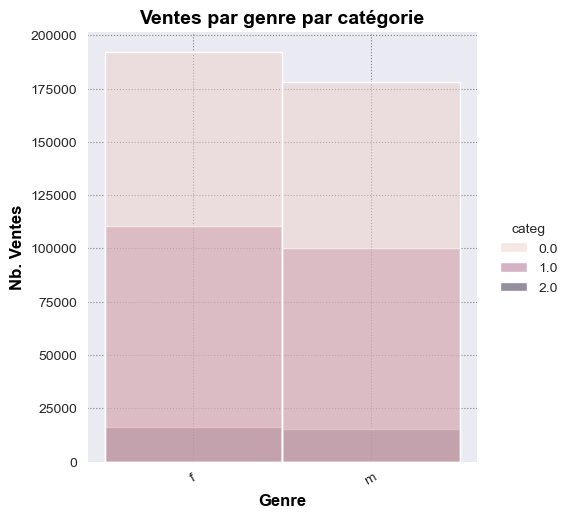

In [137]:
# Premier graph pour voir le nombre de ventes par categ par genre
sns.displot(data = df_spc_b2c, x='sex', hue='categ')

plt.title('Ventes par genre par catégorie', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Genre', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Nb. Ventes', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.xticks(rotation=30)

plt.show()

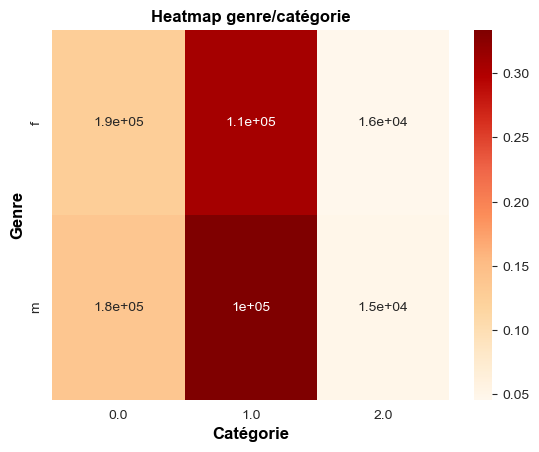

In [138]:
# Khi2

X = "sex"
Y = "categ"
# Calcul du tableau d'indépendance
cont = df_spc_b2c[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total").copy() # Tableau de contingence

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_spc_b2c)
indep = tx.dot(ty) / n # Théorique pour que tout soit indépendant

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n # Contribution à la non-indépendance (si on fait x100 cela nous donne le pourcentage par case)

sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], cmap = 'OrRd')

plt.title('Heatmap genre/catégorie', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Catégorie', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Genre', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

In [139]:
# Contribution à la non-indépendance (donc la dépendance de la catégorie face au genre)
table*100

categ,0.0,1.0,2.0,Total
sex,,,,
f,12.633051,30.706792,4.588583,0.0
m,13.725109,33.361225,4.985240,0.0
Total,0.000000,0.000000,0.000000,0.0


In [140]:
# Calcul Khi-2 et p-value et contingent théorique 
from scipy.stats import chi2_contingency as chi2_contingency

# Khi-2 sur le tableau de contingence
khi2, pval , ddl , contingent_theorique = chi2_contingency(cont)
print('Khi-2 :', khi2)
print('p-value :', pval)

Khi-2 : 18.757882515638208
p-value : 0.004592685293327873


In [141]:
# Conclusions :

# H0 : La catégorie achetée ne dépend pas du genre de client (pas de corrélation, les deux sont indépendants)
# H1 : La catégorie achetée dépend du genre de client (corrélation)

# H0 rejetée, il y a un lien entre les genre d'un client et la catégorie acheté, p-value < 0.05

### *3.2. Lien entre age et catégorie achetée (ok)*
---

In [142]:
# Lien entre age des clients et catégories achetées
# Une variable qualitative et l'autre quantitative
# ANOVA - Kruskal

# Question : L'age du client influe la catégorie qu'il achète ?
# H0 : L'age du client n'affecte pas la catégorie qu'il achète
# H1 : L'age du client affecte la catégorie qu'il achète

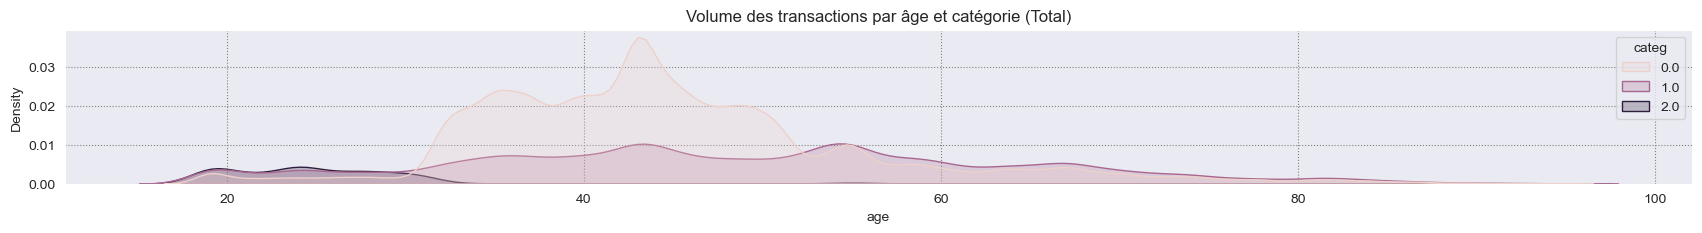

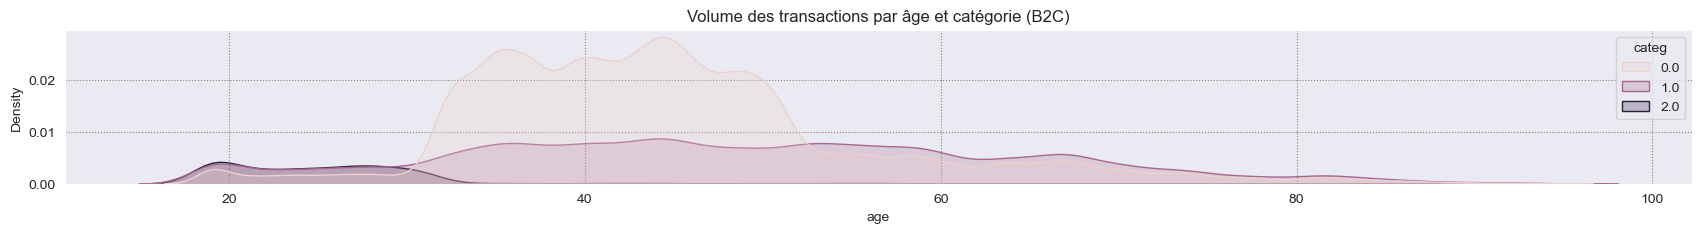

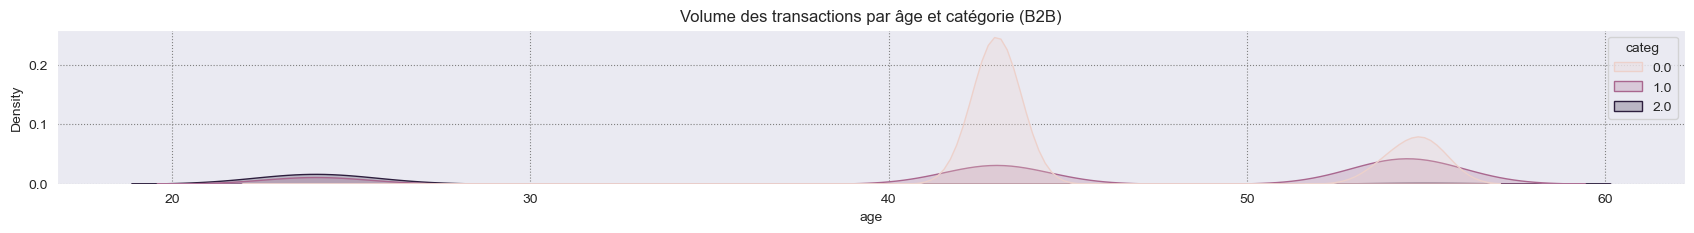

In [143]:
# Densité d'achats par age
# kdeplot, meilleure visu qu'un displot je trouve
fig, ax = plt.subplots(1, 1, figsize = (21, 2))
sns.kdeplot(ax = ax, data = df_spc, x = 'age', hue = 'categ', fill = True)
plt.title('Volume des transactions par âge et catégorie (Total)')

fig, ax = plt.subplots(1, 1, figsize = (21, 2))
sns.kdeplot(ax = ax,data = df_spc_b2c, x = 'age', hue = 'categ', fill = True)
plt.title('Volume des transactions par âge et catégorie (B2C)')

fig, ax = plt.subplots(1, 1, figsize = (21, 2))
sns.kdeplot(ax = ax, data = df_spc_b2b, x = 'age', hue = 'categ', fill = True)
plt.title('Volume des transactions par âge et catégorie (B2B)')

plt.show()

Text(0, 0.5, 'Catégorie')

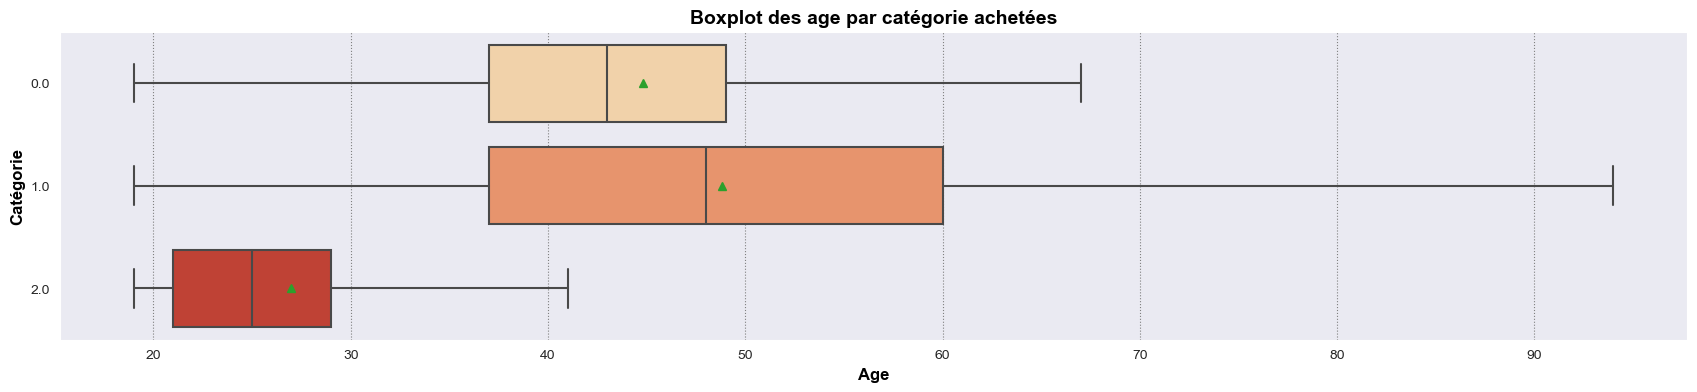

In [144]:
# On fait un box plot pour voir les ages par catégorie
# Pour une ANOVA voir si ça marche avec des variables str (oui ça marche aussi ^^)
plt.figure(figsize = (21,4))

sns.boxplot(data = df_spc_b2c, y = 'categ', x = 'age', orient = 'h', width = 0.75, showmeans = True, palette = 'OrRd', notch = False, showfliers = False)

plt.title('Boxplot des age par catégorie achetées', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Catégorie', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})


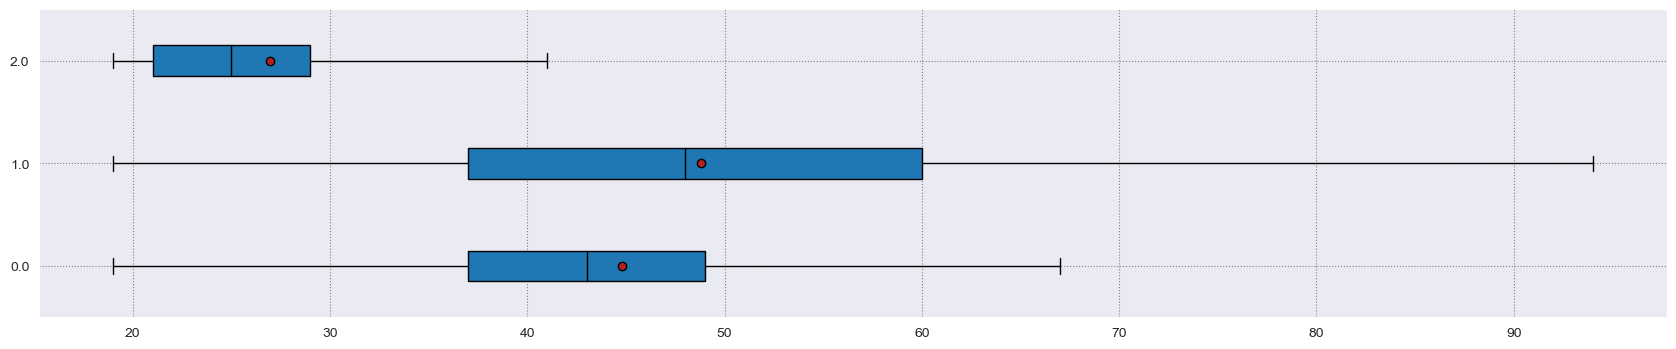

In [145]:
# Défini les deux variables à prendre
# Fait une boucle sur les variables alors qu'un hue marche aussi
# plt.boxplot un peu obscur alors qu'avec un sns.boxplot fait également le café
# Vire les outliers alors que ça pourrait être utile...

# On prend nos données de test
sous_echantillon = df_spc_b2c.copy() # copy() pour par modifier l'original
sous_echantillon

X = 'categ' # Variable qualitative
Y = 'age' # Variable quantitative

modalites = sous_echantillon[X].unique() # On prend toutes les modalités uniques dans notre echantillon, exemple les catégories (1 - 2 - 3)

groupes = [] # On fait une liste vide

for m in modalites: # Boucle sur les modalités, ajoute à groupe sous ech categ = modalité prend l'age
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes), à la place de passer les dico de styles dans la fonction du graphe
# Fait le même boxplot que j'ai fait avant mais sans les outliers...
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}
# Si je change showfliers c'est le même graphe que j'ai fait !!!
plt.figure(figsize = (21,4)) # C'est bien d'avoir un écran 21:9 ^^
plt.boxplot(groupes, labels = modalites, showfliers = False, medianprops = medianprops, vert = False, patch_artist = True, showmeans = True, meanprops = meanprops)
plt.show()

C:\Users\david\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9714465737342834, pvalue=0.0)


<AxesSubplot:xlabel='age', ylabel='Count'>

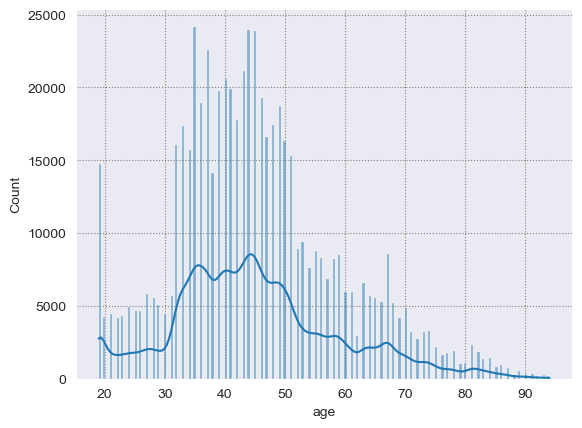

In [146]:
# Test de shapiro pour  vérifier les distri normale des ages
print(stats.shapiro(df_spc_b2c['age']))
sns.histplot(df_spc_b2c['age'], kde = True)

In [147]:
# Test ANOVA

# On défini les deux variables que l'on veut prendre dans le df à tester
X = 'categ' # qualitative
Y = 'age' # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

# ANOVA > 0,donc possible lien entre ces deux variables
# H0 rejetée, l'age influe sur la catégorie achetée par le client
# ANOVA toutefois faible, sur le boxplot on remarque un lien entre l'age et les categ 0 et 1 dont les moyennes sont proches, la categ 2 est plus appréciée des jeunes
print('eta² :', round(eta_squared(df_spc_b2c[X],df_spc_b2c[Y]), 4)) # Applique la fonction sur nos deux variables dans notre échantillon ou df et calcul le rapport de corrélation

eta² : 0.1131


In [148]:
# On remarque que la distribution des ages n'est pas normale, ce qui ne remplis pas toutes les conditions de l'ANOVA, on fait donc un test de Kruskal

# Test entre l'age et la catégorie achetée
# On groupby sur les catégories (var qualitative) et on test l'age (var quantitative)
kstat, pval = stats.kruskal(*[group["age"].values for name, group in df_spc_b2c.groupby("sex")])

# Récupérer la p-value
print('p-value :' ,pval, 'kstat :', round(kstat, 4)) # Si pval petit (au moins inférieure à 0.05, alors on peut parler de différence significative)

p-value : 2.0709499589294486e-55 kstat : 245.8639


In [149]:
# Le test de Kruskal nous retourne une p-value de 0, donc confirmation que H0 est rejetée, il y a bien un lien entre l'age des client et la catégorie achetée

In [150]:
# Conclusions :

# Question : L'age du client influe la catégorie qu'il achète ?
# H0 : L'age du client n'affecte pas la catégorie qu'il achète (pas de corrélation)
# H1 : L'age du client affecte la catégorie qu'il achète (corrélation)

# H0 rejetée, ANOVA nous montre un faible lien entre l'age et la catégorie achetée (toutefois les conditions d'une ANOVA ne sont pas remplies),
# ce qui se vois aussi sur les boxplot. De plus j'ai fais un test de Kruskal afin d'en avoir confirmation et la p-value est de 0
# ce qui confirme donc cette observation

### *3.3. Lien entre age et montant total des achats (ok)*
---

In [151]:
# Lien entre age des clients et montant total des achats
# Deux variables quantitatives
# Pearson

# Question : Est-ce que le montant total des achats est fonction de l'age des clients ?
# H0 : Le montant total des achats est indépendant de l'age des clients
# H1 : Le montant total des achats est fonction de l'age des clients

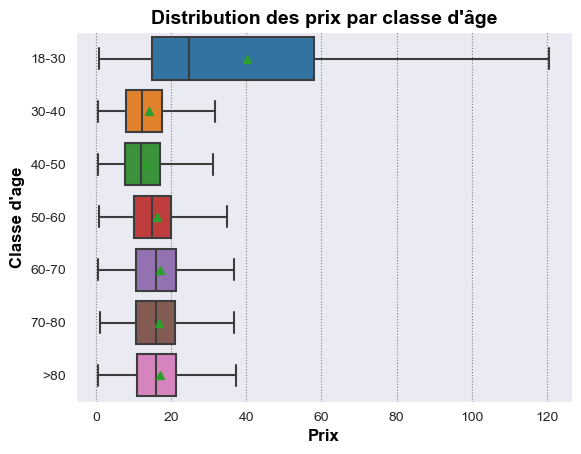

In [152]:
# On fait un boxplot des prix par tranche d'age
sns.boxplot(data = df_spc_b2c.sort_values(by = 'classe_age'), y = 'classe_age', x = 'price', showfliers = False, showmeans = True)

plt.title('Distribution des prix par classe d\'âge', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Prix', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Classe d\'age', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

In [153]:
# CA et achat global par age
test = df_spc_b2c.groupby(['age', 'sex']).agg({'price' : 'sum', 'date' : 'count', 'classe_age' : 'first'})
test = test.reset_index()
test

,age,sex,price,date,classe_age
0,19.0,f,304402.67,7718,18-30
1,19.0,m,287011.56,7051,18-30
2,20.0,f,76118.73,1942,18-30
3,20.0,m,96713.02,2296,18-30
4,21.0,f,76083.91,1863,18-30
...,...,...,...,...,...
147,92.0,m,1770.50,117,>80
148,93.0,f,3006.80,171,>80
149,93.0,m,952.44,51,>80
150,94.0,f,842.87,49,>80


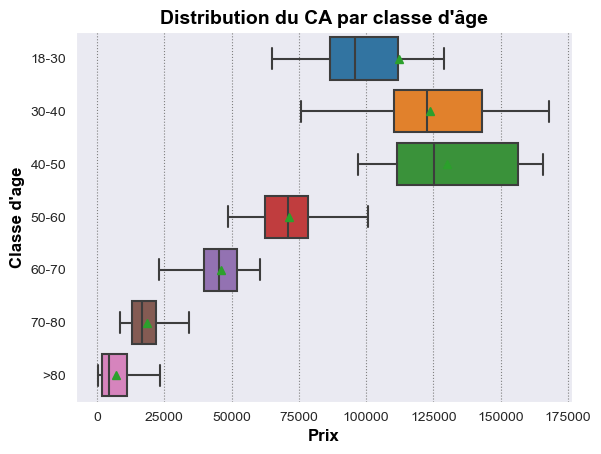

In [154]:
# On fait un boxplot du CA total par tanche d'age
sns.boxplot(data=test.sort_values(by = 'classe_age'), x = 'price', y = 'classe_age', showfliers = False, showmeans = True)

plt.title('Distribution du CA par classe d\'âge', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Prix', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Classe d\'age', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

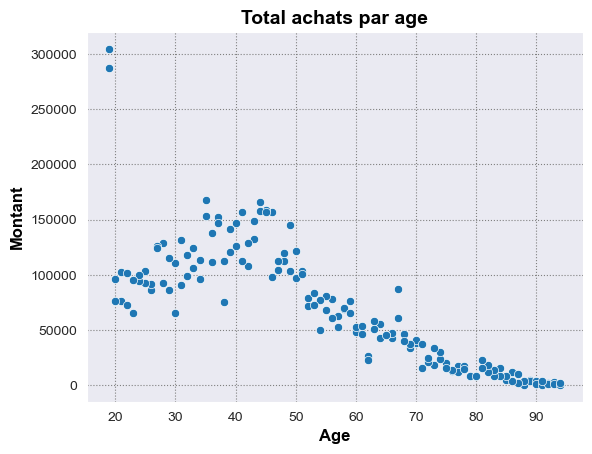

In [155]:
# On remarque que les clients de 19 ans on réalisés un grand montant total d'achat, à vérifier
sns.scatterplot(data=test.sort_values(by = 'classe_age'), x = 'age', y = 'price')

plt.title('Total achats par age', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Montant', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})


plt.show()

<AxesSubplot:xlabel='price', ylabel='classe_age'>

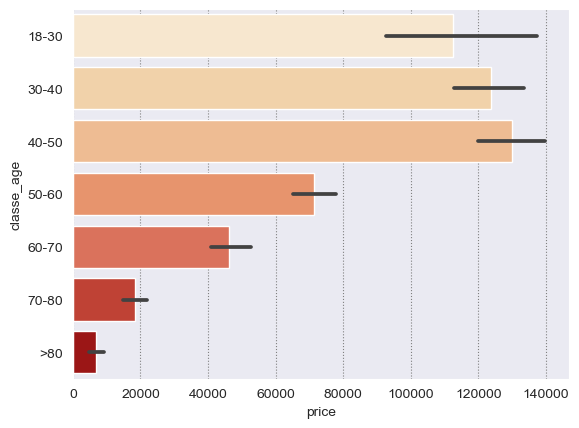

In [156]:
# Barplot avec classe age et CA global
sns.barplot(data = test, y = 'classe_age', x = 'price', palette = 'OrRd')

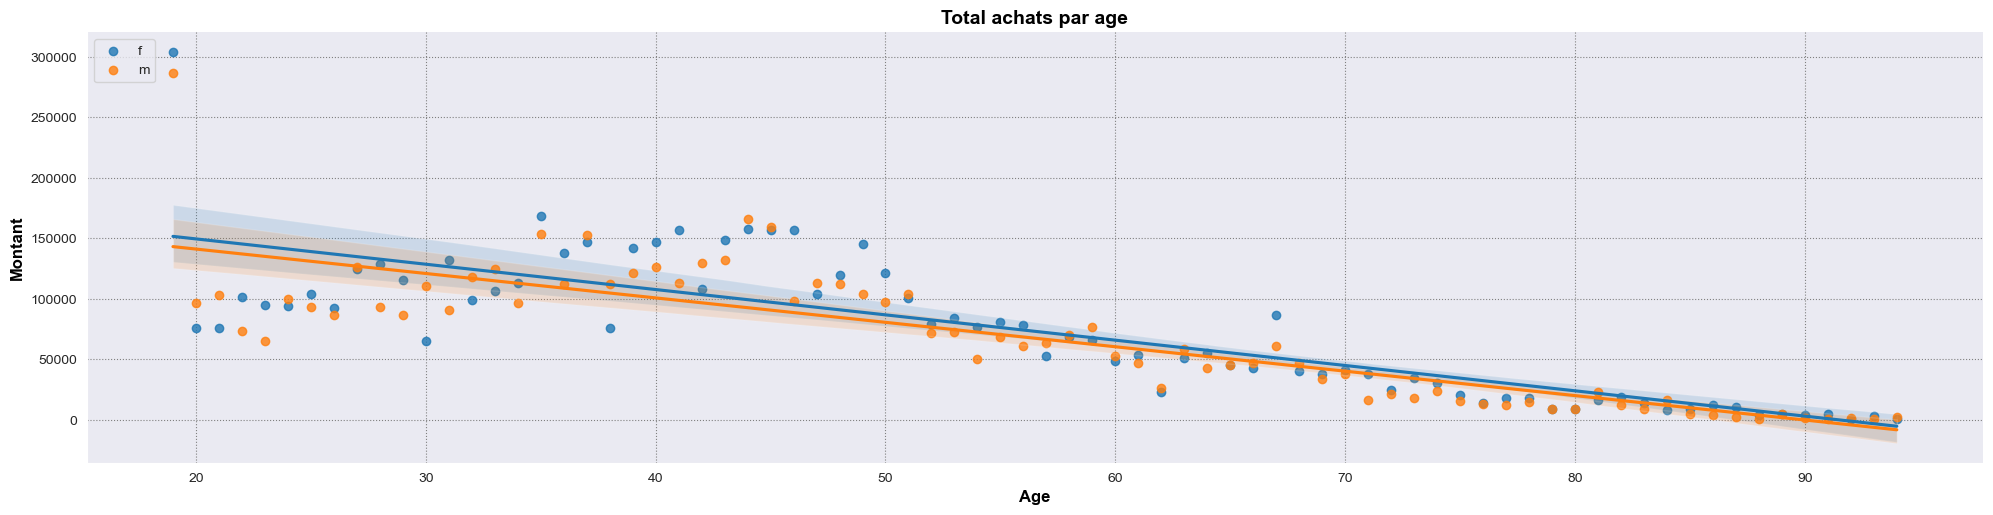

In [157]:
# Droite de régression linéaire avec seaborn (source, mon livre) avec une séparation entre le genre (juste pour voir graphiquement, pour le calcul du Pearson on en tiendra pas compte)
sns.lmplot(data = test, x = 'age', y = 'price', hue = 'sex', aspect = 4, legend = False) # Avec deux genre sur le même graph

plt.legend(loc='upper left')
plt.title('Total achats par age', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Montant', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

In [158]:
# Test de pearson entre age et nombre d'achat

a, b = stats.pearsonr(test['age'], test['price'])

print(stats.pearsonr(test['age'], test['price']))

# pearson² = % de variation expliquée
print('Pearson : ', round(a, 2))
print('R²', round((a**2), 2))
print('p-value :', b)
# H0 : Le montant total des achats est indépendant de l'age des clients
# p-value proche de 0, donc H0 rejetée, le total des achats varie en fonction de l'age
# On remarque un fort lien en négatif, ce qui est corrélé avec un graph de régression linéaire

PearsonRResult(statistic=-0.8193554837639336, pvalue=4.5080259912954016e-38)
Pearson :  -0.82
R² 0.67
p-value : 4.5080259912954016e-38


ShapiroResult(statistic=0.9143408536911011, pvalue=7.944666435832914e-08)


<AxesSubplot:xlabel='price', ylabel='Count'>

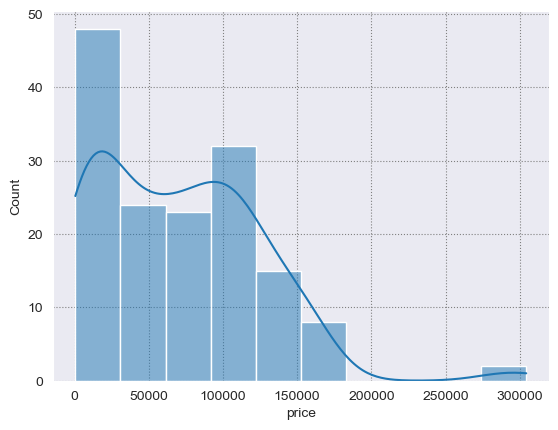

In [159]:
# Test de Shapiro sur une ou plusieurs variable
print(stats.shapiro(test['price']))

# Histogramme sur une variable
sns.histplot(test['price'], kde = True)

# La distri du prix n'est pas normael

In [160]:
# Test non paramétrique de Spearman car les données ne suivent pas la loi normale
stats.spearmanr(test['age'], test['price'])

SpearmanrResult(correlation=-0.8673462780442026, pvalue=2.629449075299143e-47)

In [161]:
# Conclusions :

# Question : Est-ce que le montant total des achats est fonction de l'age des clients ?
# H0 : Le montant total des achats est indépendant de l'age des clients
# H1 : Le montant total des achats est fonction de l'age des clients

# On rejette H0, le montant total des achats varie en fonction de l'age. On le remarque clairement en traçant la droite de regression
# On confirme en faisant un Pearson qui nous retourne un coefficient de -0.82, donc lien fort en négatif, ainsi qu'une p-value très proche de 0
# On remarque également que les clients de 19 ans ont fait énormement d'achats

### *3.4. Lien entre age et fréquence d'achat (ok)*
---

In [162]:
# Lien entre age des clients et fréquence d'achat

# Tel age fait x achat par jours ?

# Fréquence moyenne des achats = nombre de commandes ÷ nombre de clients
# Exemple : Nbr d'achat de clients de 19 ans / nombre de clients de 19 ans ?

# Nombre moyen d'achat par mois par age ou au global ?

# GB age et count date ?
# Deuxvariables quantitatives
# Coeff depearson ?

# Question : Est-ce que la fréquence d'achat change en fonction de l'age ?
# H0 : La fréquence d'achat est indépendante de l'age des clients
# H1 :La fréquence d'achat est dépendante de l'age des clients

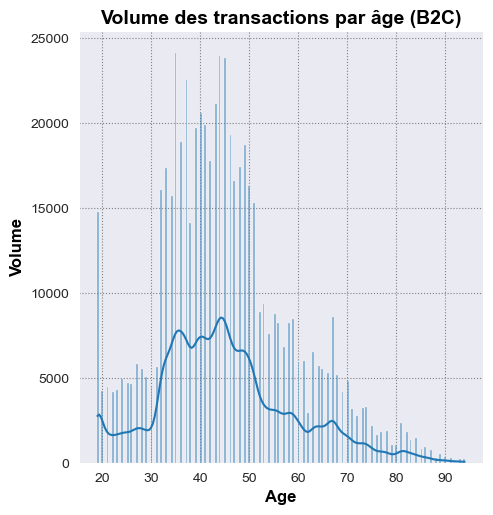

In [163]:
# displot pour voir un peu la répartition des ventes entre les ages
sns.displot(data = df_spc_b2c, x = 'age', kde = True)

plt.title('Volume des transactions par âge (B2C)', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Volume', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

In [164]:
# Première approche au global

<AxesSubplot:xlabel='age', ylabel='freq'>

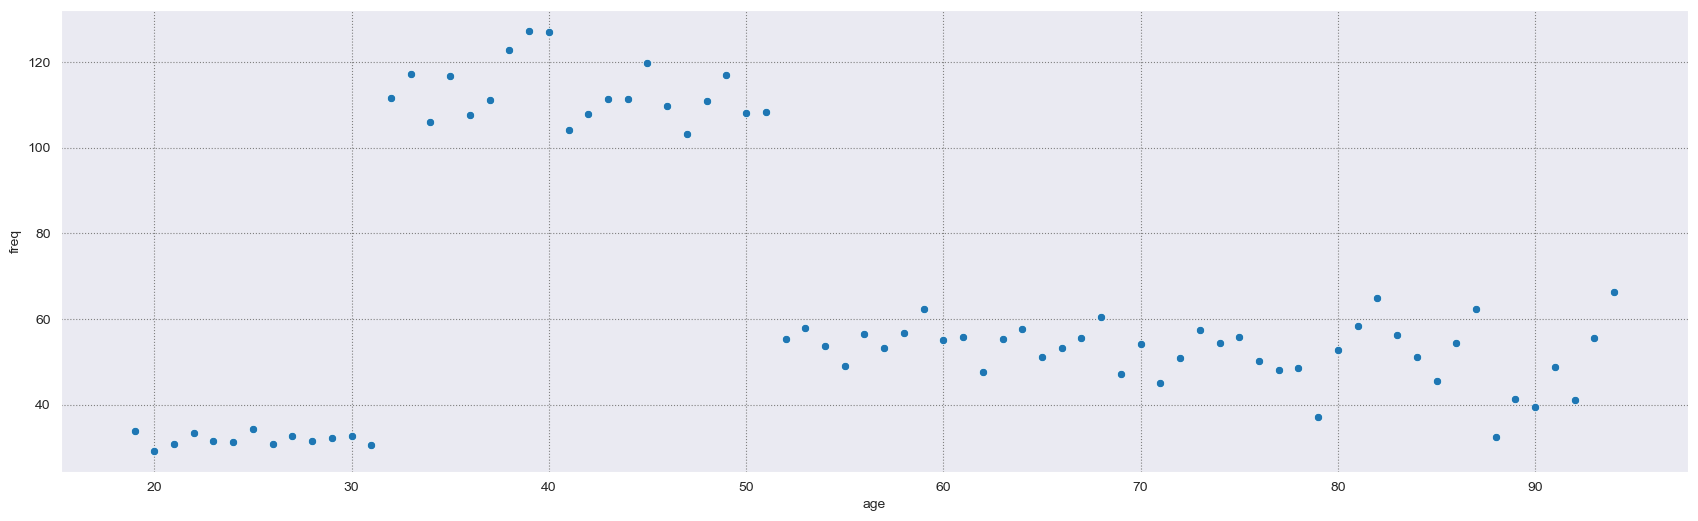

In [165]:
# On pivote sur 'age', on compte le nombre de clients uniques et le nombre de vente pour chaque (cela sur la période globale)
df_freq = df_spc_b2c.pivot_table(index='age', aggfunc={'client_id' : 'nunique', 'id_prod' : 'count'}).copy()
df_freq['freq'] = df_freq['id_prod'] / df_freq['client_id']

plt.figure(figsize = (21,6)) # C'est bien d'avoir un écran 21:9 ^^

sns.scatterplot(data = df_freq, x = 'age', y = 'freq')

In [166]:
df_freq = df_freq.reset_index()
df_freq

,age,client_id,id_prod,freq
0,19.0,437,14769,33.796339
1,20.0,145,4238,29.227586
2,21.0,145,4468,30.813793
3,22.0,125,4161,33.288000
4,23.0,136,4299,31.610294
...,...,...,...,...
71,90.0,8,315,39.375000
72,91.0,6,293,48.833333
73,92.0,4,164,41.000000
74,93.0,4,222,55.500000


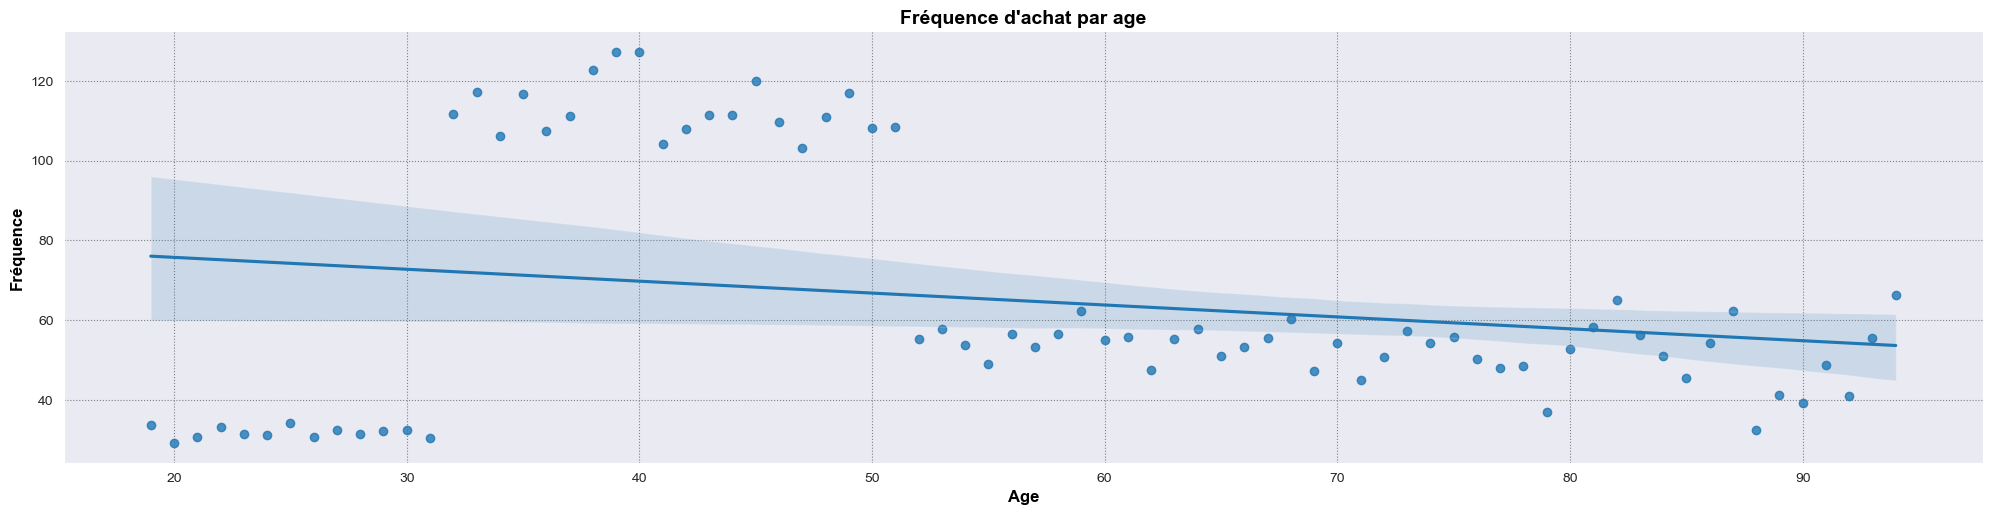

y = -0.29829647787806685 * x + 81.72589910152465


In [167]:
sns.lmplot(data = df_freq, x = 'age', y = 'freq', aspect = 4)

plt.title('Fréquence d\'achat par age', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Fréquence', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

# Calcul de l'équation de la droite de régression
Y = df_freq['freq']
X = df_freq[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']
print('y =', a, '* x +', b)

In [168]:
# Test de pearson entre age et nombre d'achat
# On remarque un fort lien en négatif, ce qui est corrélé avec une régression linéaire
a, b = stats.pearsonr(df_freq['age'], df_freq['freq'])

print(stats.pearsonr(df_freq['age'], df_freq['freq']))

# pearson² = % de variation expliquée
print('Pearson : ', round(a, 2))
print('R²', round((a**2), 2))
print('p-value :', b)
# H0 : La fréquence d'achat ne varie pas en fonction de l'age (les deux sont indépendants)
# p-value > 0.05, faible présomption contre H0

# On remarque un léger lien en négatif, ce qui est corrélé avec une régression linéaire
# On pourrait être tenté d'accepter H0 car p-value > 0.05, mais en regardant le graph il y a un doute
# On vérifie par une deuxième approche en prenant la fréquence par age par mois

PearsonRResult(statistic=-0.2154697850834853, pvalue=0.061579287370946735)
Pearson :  -0.22
R² 0.05
p-value : 0.061579287370946735


In [169]:
# Deuxième approche par mois

<AxesSubplot:xlabel='age', ylabel='freq'>

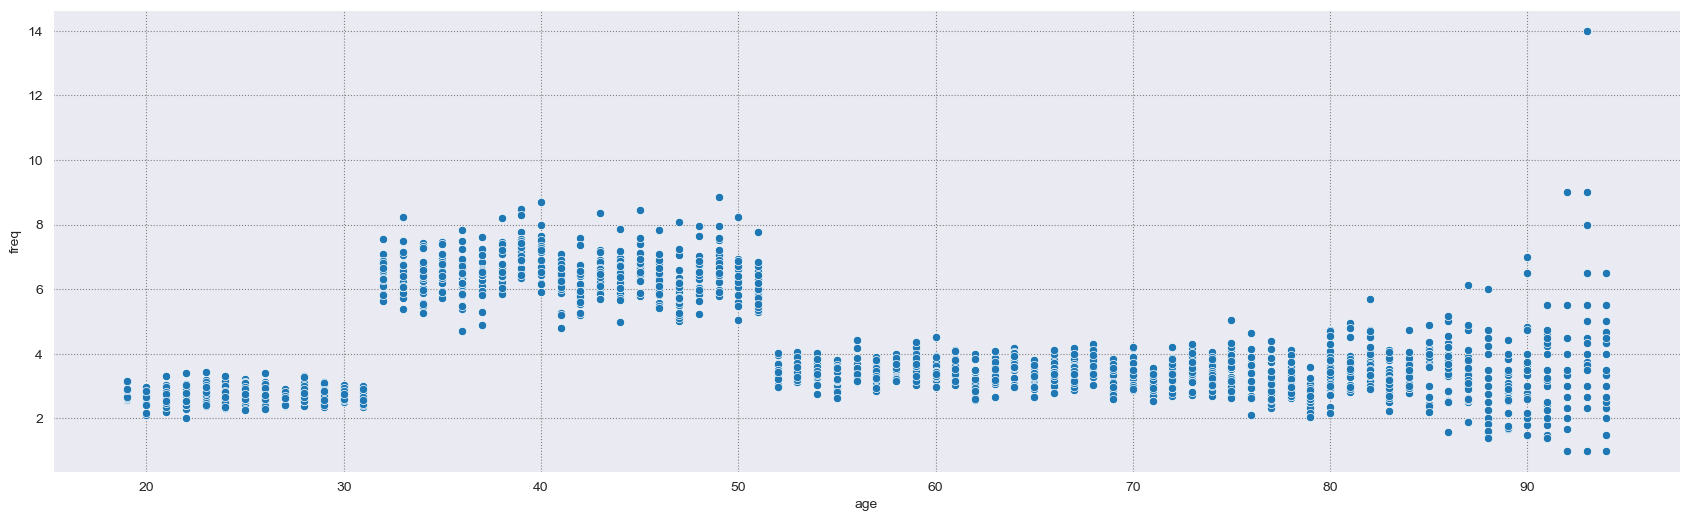

In [170]:
# On veux le nombre d'achat par age et le nombre de client unique par age, cela par mois (par client unique)
# On calculera ensuite la fréquence d'achat : nb achats / nb clients = frequence achat
df_freq_test = df_spc_b2c.groupby(['age', 'year', 'month']).agg({'id_prod' : 'count', 'client_id' : 'nunique'}).copy()
df_freq_test['freq'] = df_freq_test['id_prod'] / df_freq_test['client_id']

plt.figure(figsize = (21,6)) # C'est bien d'avoir un écran 21:9 ^^

sns.scatterplot(data = df_freq_test, x = 'age', y = 'freq', palette = 'OrRd')

In [171]:
df_freq_test = df_freq_test.reset_index()
df_freq_test

,age,year,month,id_prod,client_id,freq
0,19.0,2021,3,596,220,2.709091
1,19.0,2021,4,581,223,2.605381
2,19.0,2021,5,646,240,2.691667
3,19.0,2021,6,645,235,2.744681
4,19.0,2021,7,683,253,2.699605
...,...,...,...,...,...,...
1743,94.0,2022,10,10,2,5.000000
1744,94.0,2022,11,15,3,5.000000
1745,94.0,2022,12,13,2,6.500000
1746,94.0,2023,1,14,3,4.666667


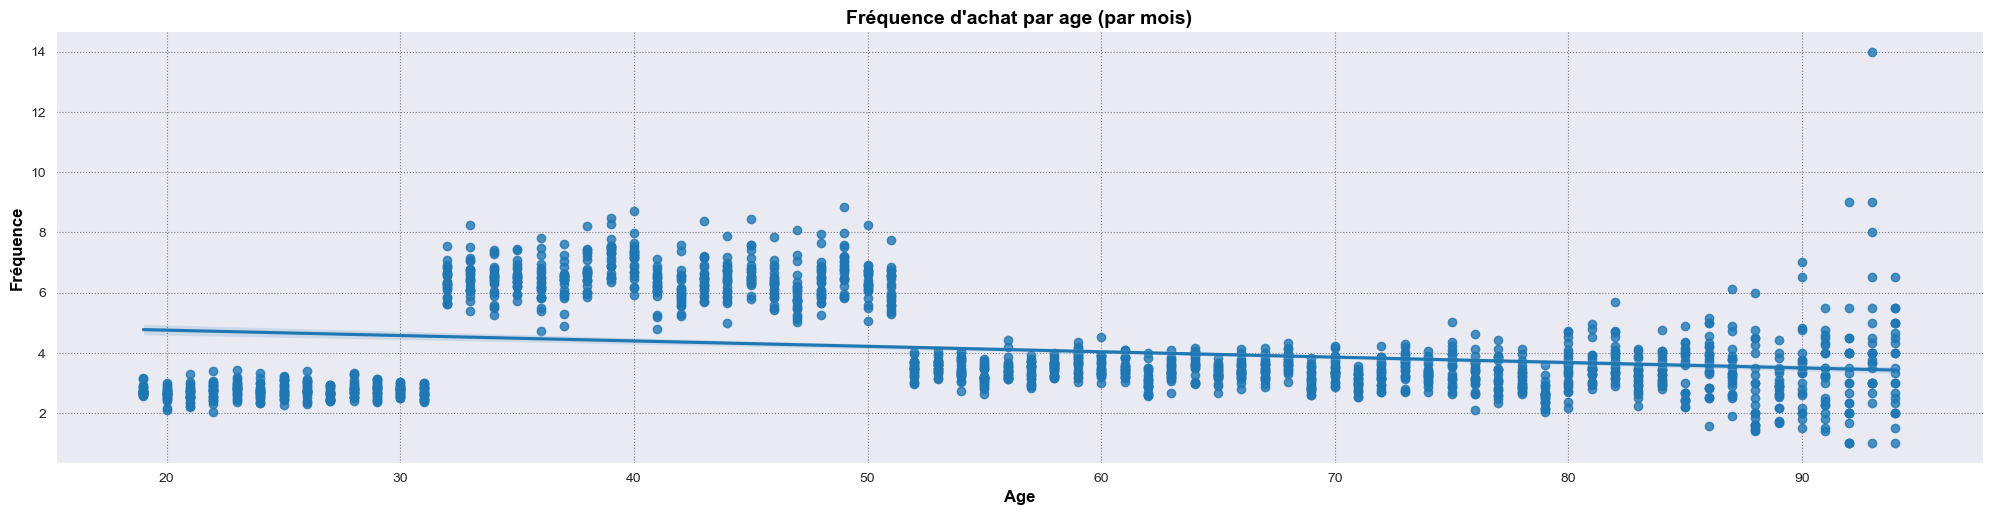

y = -0.01791747678188744 * x + 5.109801220084989


In [172]:
sns.lmplot(data = df_freq_test, x = 'age', y = 'freq', aspect = 4)

plt.title('Fréquence d\'achat par age (par mois)', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Fréquence', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

# Calcul de l'équation de la droite de régression
Y = df_freq_test['freq']
X = df_freq_test[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']
print('y =', a, '* x +', b)

In [173]:
# Test de pearson entre age et nombre d'achat
# On remarque un fort lien en négatif, ce qui est corrélé avec une régression linéaire
a, b = stats.pearsonr(df_freq_test['age'], df_freq_test['freq'])

print(stats.pearsonr(df_freq_test['age'], df_freq_test['freq']))

# pearson² = % de variation expliquée
print('Pearson : ', round(a, 2))
print('R²', round((a**2), 2))
print('p-value :', b)
# H0 : La fréquence d'achat varie en fonction de l'age
# p-value < 0.05, très forte présomption contre H0, donc la fréquance d'acaht varie en fonction de l'age
# Plus on a de données plus on peux dire que l'age influe peu sur la fréquence
# On remarque un léger lien en négatif, ce qui est corrélé avec une régression linéaire

PearsonRResult(statistic=-0.24493406283007044, pvalue=2.701218238649488e-25)
Pearson :  -0.24
R² 0.06
p-value : 2.701218238649488e-25


ShapiroResult(statistic=0.8740500807762146, pvalue=2.105472529370621e-35)


<AxesSubplot:xlabel='freq', ylabel='Count'>

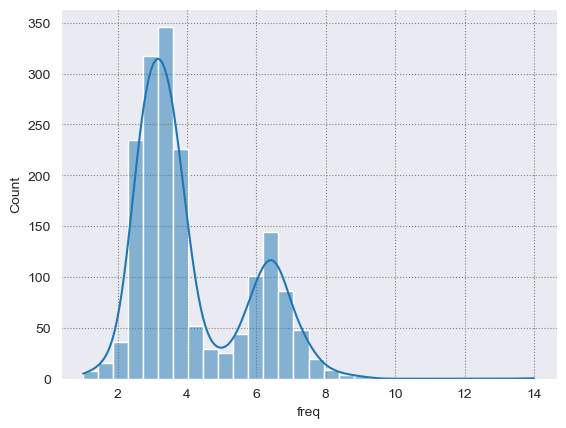

In [174]:
# Test de Shapiro sur une ou plusieurs variable
print(stats.shapiro(df_freq_test['freq']))

# Histogramme sur une variable
sns.histplot(df_freq_test['freq'], kde = True)

# La distri du prix n'est pas normael

In [175]:
# Test non paramétrique de Spearman car les données ne suivent pas la loi normale
stats.spearmanr(df_freq_test['age'], df_freq_test['freq'])

SpearmanrResult(correlation=-0.08158047348402811, pvalue=0.0006400312152320382)

In [176]:
# Conclusions :

# Question : Est-ce que la fréquence d'achat change en fonction de l'age ?
# H0 : La fréquence d'achat est indépendante de l'age des clients
# H1 :La fréquence d'achat est dépendante de l'age des clients

# On rejète H0, on voit clairement sur le graph que les clients entre 30 et 50 ans achètent beaucoup plus fréquenment
# De plus, la p-value est très nettement proche de 0 ce qui confirme le rejet de H0
# On déduis également que la fréquence d'achat diminue avec l'age

### *3.5. Lien entre age et panier moyen (ok)*
---

In [177]:
# Lien entre age des clients et taille du panier moyen
# Deux variables quantitatives

# Montant moyen d'achat par moi par age ?

# Question : Est-ce que la panier moyen change en fonction de l'age ?
# H0 : Le panier moyen est indépendant de l'age du client
# H1 : Le panier moyen varie en fonction de l'age du client

In [178]:
# Calculer le panier moyen par age au global
# On groupe sur l'age et on calcul la moyenne des achats, au global ou par mois ?
df_spc_b2c

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age,day,month,year
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,f,1967.0,56.0,50-60,1,3,2021
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960.0,63.0,60-70,1,3,2021
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988.0,35.0,30-40,1,3,2021
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989.0,34.0,30-40,1,3,2021
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956.0,67.0,60-70,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
657721,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,21.92,1.0,f,1996.0,27.0,18-30,28,2,2023
657722,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,48.99,2.0,f,1994.0,29.0,18-30,28,2,2023
657723,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,26.99,1.0,f,1985.0,38.0,30-40,28,2,2023
657724,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,8.99,0.0,m,1953.0,70.0,60-70,28,2,2023


In [179]:
# Première version, age et panier moyen global sur tout la période
# Calculer le panier moyen par mois et en faire la moyenne ?

<AxesSubplot:xlabel='age', ylabel='p_moy'>

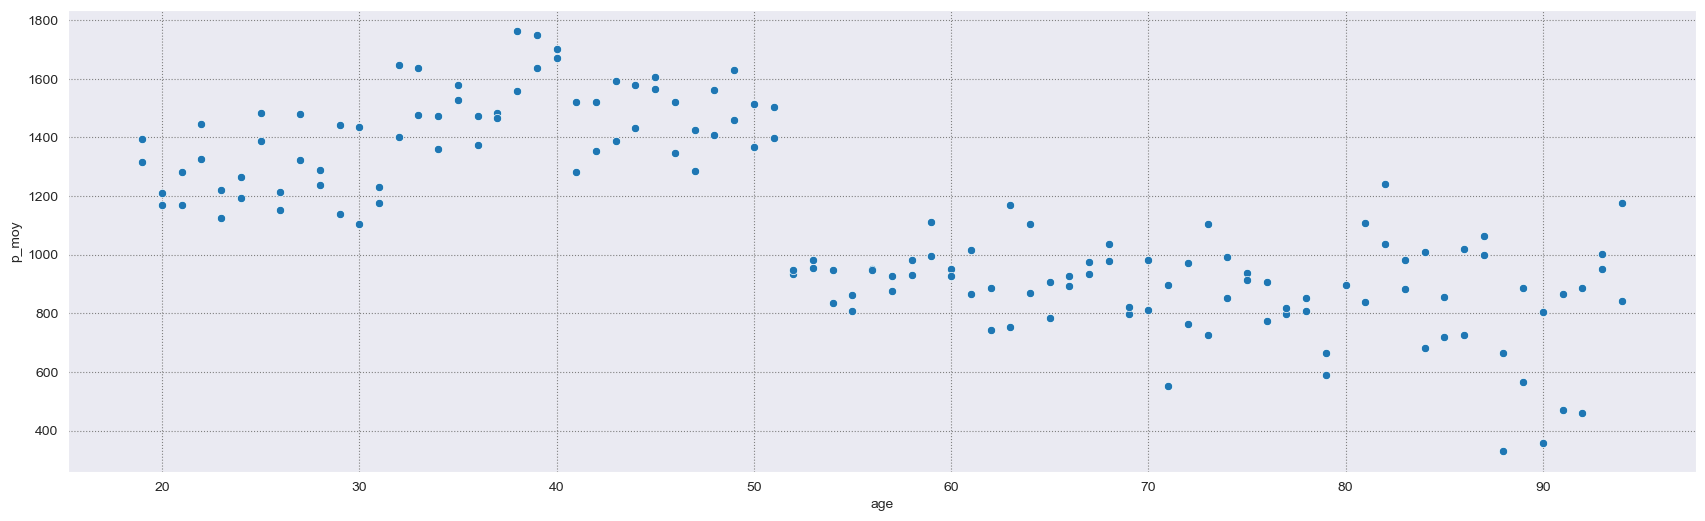

In [180]:
# On pivote sur 'age', on compte le nombre de clients uniques et la somme des achats
df_panier_moy = df_spc_b2c.pivot_table(index=['age', 'sex'], aggfunc={'client_id' : 'nunique', 'price' : 'sum'}).copy()
# On calcul le panier moyen en divisant le total par age par le nombre de clients de cet age
df_panier_moy['p_moy'] = df_panier_moy['price'] / df_panier_moy['client_id']
df_panier_moy
# Cette méthode ne donne pas vraiment d'infos, sur la période de l'analyse par exemple, les clients de 50 ans on achetés en moyenne pour 1400€ de livres, dans le temps ces stats risquent de varier
plt.figure(figsize = (21,6)) # C'est bien d'avoir un écran 21:9 ^^
# Barplot panier par categ age
sns.scatterplot(data = df_panier_moy, x = 'age', y = 'p_moy')


In [181]:
# On reset l'index pour fair un lmplot
df_panier_moy = df_panier_moy.reset_index()
df_panier_moy

,age,sex,client_id,price,p_moy
0,19.0,f,231,304402.67,1317.760476
1,19.0,m,206,287011.56,1393.260000
2,20.0,f,65,76118.73,1171.057385
3,20.0,m,80,96713.02,1208.912750
4,21.0,f,65,76083.91,1170.521692
...,...,...,...,...,...
147,92.0,m,2,1770.50,885.250000
148,93.0,f,3,3006.80,1002.266667
149,93.0,m,1,952.44,952.440000
150,94.0,f,1,842.87,842.870000


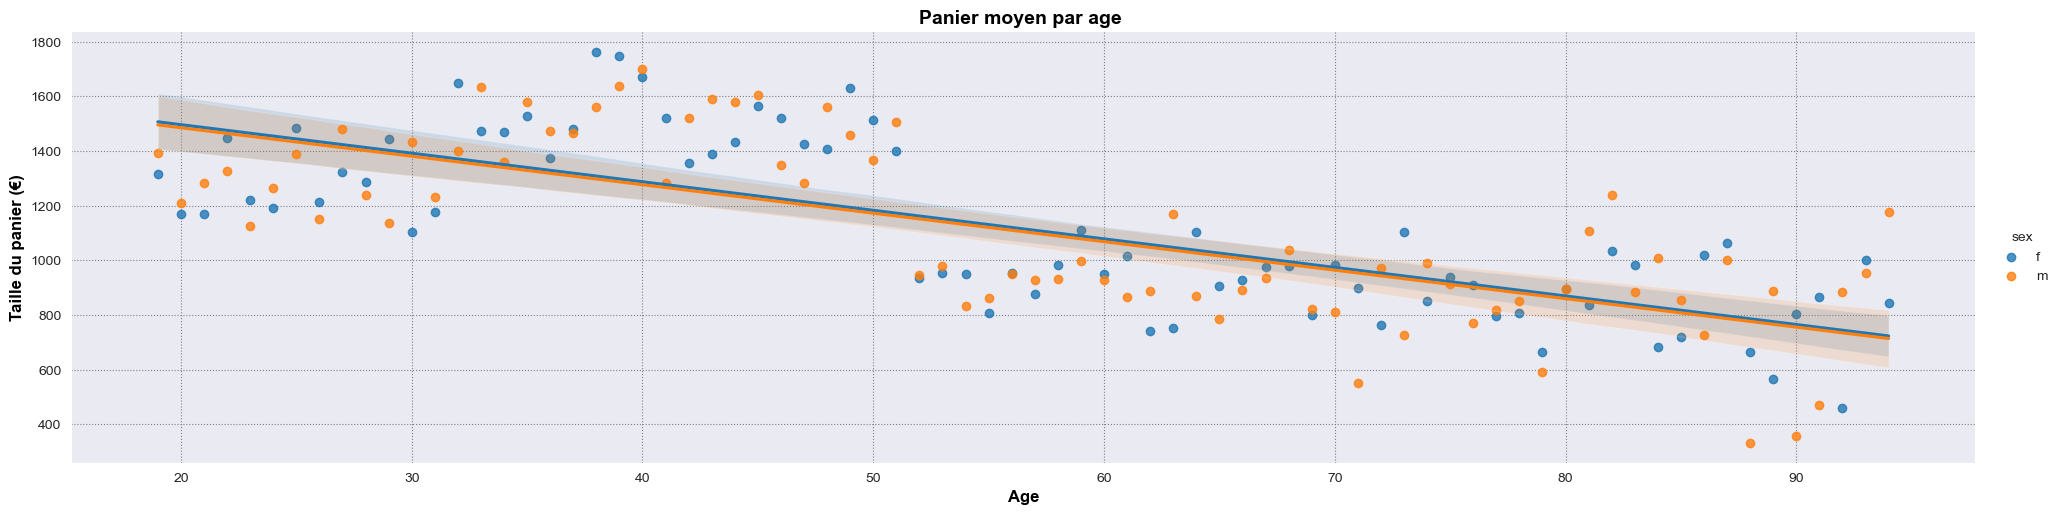

y = -10.43763242405759 * x + 1699.9883423105746


In [182]:
sns.lmplot(data = df_panier_moy, x = 'age', y = 'p_moy', hue = 'sex', aspect = 4)

plt.title('Panier moyen par age ', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Taille du panier (€)', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

# Calcul de l'équation de la droite de régression
Y = df_panier_moy['p_moy']
X = df_panier_moy[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']
print('y =', a, '* x +', b)

In [183]:
# Test de pearson entre age et nombre d'achat
# On remarque un fort lien en négatif, ce qui est corrélé avec une régression linéaire
a, b = stats.pearsonr(df_panier_moy['age'], df_panier_moy['p_moy'])

print(stats.pearsonr(df_panier_moy['age'], df_panier_moy['p_moy']))

# pearson² = % de variation expliquée
print('Pearson : ', round(a, 2))
print('R²', round((a**2), 2))
print('p-value :', b)
# H0 : Le panier moyen ne varie pas en fonction de l'age
# p-value < 0.05, très forte présomption contre H0
# On remarque un fort en négatif, ce qui est corrélé avec une régression linéaire

PearsonRResult(statistic=-0.7284992734111562, pvalue=2.0242539035969598e-26)
Pearson :  -0.73
R² 0.53
p-value : 2.0242539035969598e-26


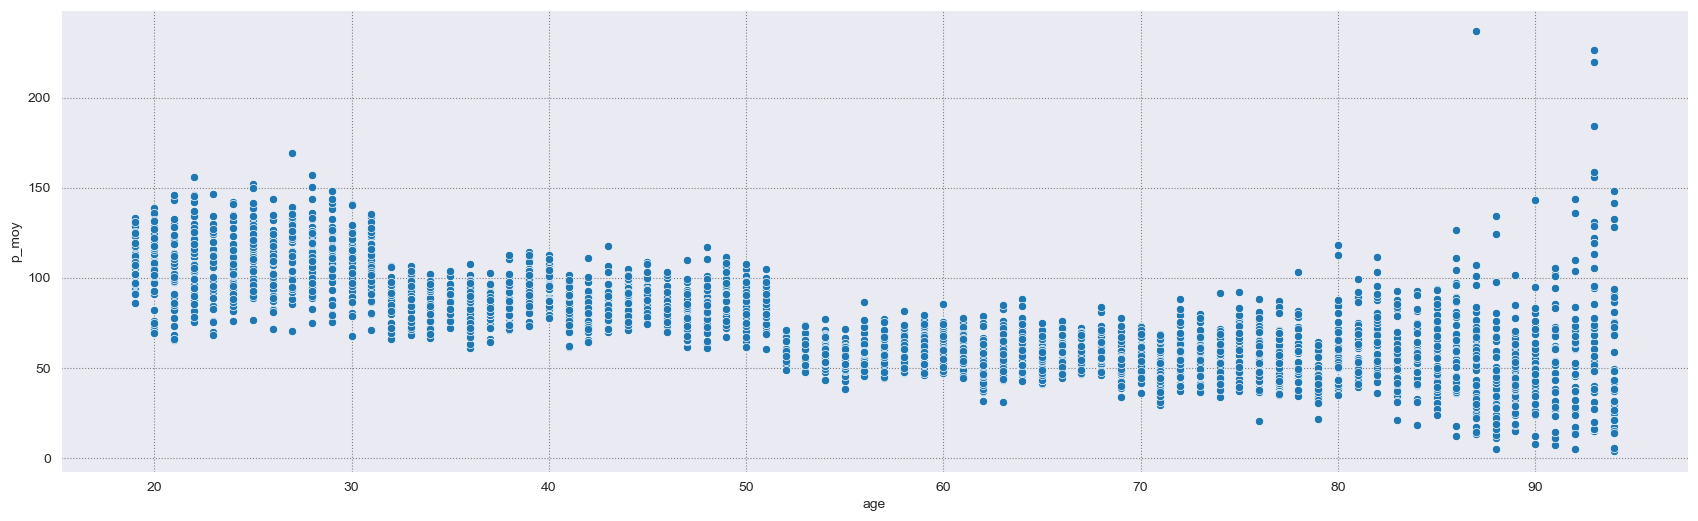

In [184]:
# Prise en compte du panier moyen par age et par mois par client unique
# On veux le nombre d'achat par age et le nombre de client unique par age, cela par mois pour le panier moyen mensuel par age (plus logique qu'un panier moyen global...)
# On calculera ensuite panier moyen par age : (valeur du panier par client de tel age par mois) / nombre de client de tel age
df_panier_moy_test = df_spc_b2c.groupby(['age', 'year', 'month', 'sex']).agg({'price' : 'sum', 'client_id' : 'nunique'}).copy()
df_panier_moy_test['p_moy'] = df_panier_moy_test['price'] / df_panier_moy_test['client_id']
# df_panier_moy_test = df_panier_moy_test.groupby('age').agg({'p_moy' : 'mean'})

plt.figure(figsize = (21,6)) # C'est bien d'avoir un écran 21:9 ^^

sns.scatterplot(data = df_panier_moy_test, x = 'age', y = 'p_moy')

plt.show()

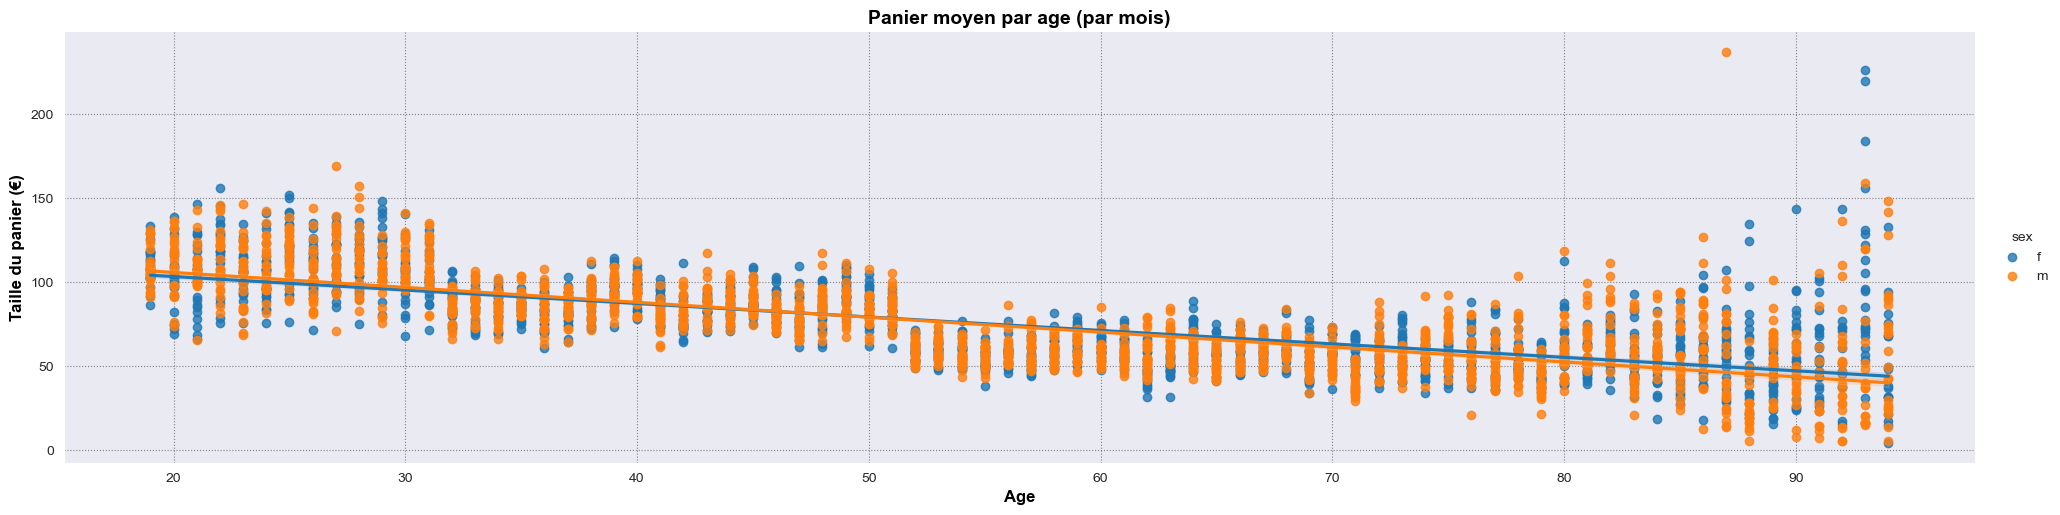

y = -0.8443868879380678 * x + 121.2492516957597


In [185]:
# On reset l'index sinon le graph ne veux pas
df_panier_moy_test = df_panier_moy_test.reset_index().copy()

sns.lmplot(data = df_panier_moy_test, x = 'age', y = 'p_moy', hue = 'sex', aspect = 4)

plt.title('Panier moyen par age (par mois)', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Taille du panier (€)', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})


plt.show()

# Calcul de l'équation de la droite de régression
Y = df_panier_moy_test['p_moy']
X = df_panier_moy_test[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']
print('y =', a, '* x +', b)

In [186]:
# Test de pearson entre age et nombre d'achat
# On remarque un fort lien en négatif, ce qui est corrélé avec une régression linéaire
a, b = stats.pearsonr(df_panier_moy_test['age'], df_panier_moy_test['p_moy'])

print(stats.pearsonr(df_panier_moy_test['age'], df_panier_moy_test['p_moy']))

# pearson² = % de variation expliquée
print('Pearson : ', round(a, 2))
print('R²', round((a**2), 2))
print('p-value :', b)
# H0 : Le panier moyen ne dépend pas de l'age
# p-value =0, très forte présomption contre H0
# Plus on a de données plus on voit le lien entre l'age et le panier moyen (ce qu'on voit sur le scatterplot)
# On remarque un fort lien en négatif, ce qui est corrélé avec une régression linéaire

PearsonRResult(statistic=-0.7036065577996109, pvalue=0.0)
Pearson :  -0.7
R² 0.5
p-value : 0.0


ShapiroResult(statistic=0.9809441566467285, pvalue=3.694925323394877e-21)


<AxesSubplot:xlabel='p_moy', ylabel='Count'>

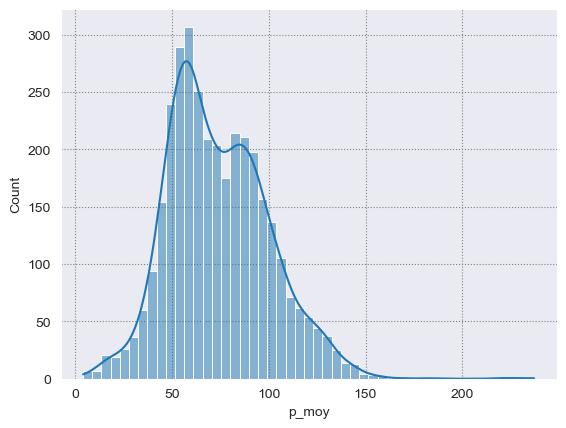

In [187]:
# Test de Shapiro sur une ou plusieurs variable
print(stats.shapiro(df_panier_moy_test['p_moy']))

# Histogramme sur une variable
sns.histplot(df_panier_moy_test['p_moy'], kde = True)

# La distri du prix n'est pas normael

In [188]:
# Test non paramétrique de Spearman car les données ne suivent pas la loi normale
stats.spearmanr(df_panier_moy_test['age'], df_panier_moy_test['p_moy'])

SpearmanrResult(correlation=-0.7333046335240158, pvalue=0.0)

In [189]:
# Conclusions :

# Question : Est-ce que la panier moyen change en fonction de l'age ?
# H0 : Le panier moyen est indépendant de l'age du client
# H1 : Le panier moyen varie en fonction de l'age du client

# p-value = 0, on rejète donc H0 il y a donc bien un lien entre l'age et le panier moyen
# On remarque également qu'il diminue avec l'age mais qu'il est beaucoup plus dispersé chez les plus de 80 ans

In [190]:
# Merci de votre attention

# D. GESSER

# Test avec Thomas

In [191]:
df_spc_b2c

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age,day,month,year
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,f,1967.0,56.0,50-60,1,3,2021
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960.0,63.0,60-70,1,3,2021
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988.0,35.0,30-40,1,3,2021
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989.0,34.0,30-40,1,3,2021
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956.0,67.0,60-70,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
657721,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,21.92,1.0,f,1996.0,27.0,18-30,28,2,2023
657722,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,48.99,2.0,f,1994.0,29.0,18-30,28,2,2023
657723,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,26.99,1.0,f,1985.0,38.0,30-40,28,2,2023
657724,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,8.99,0.0,m,1953.0,70.0,60-70,28,2,2023


,age,price
0,19.0,70.904475
1,20.0,69.577999
2,21.0,70.755105
3,22.0,73.533387
4,23.0,68.098325
5,24.0,70.519027
6,25.0,72.521682
7,26.0,72.045303
8,27.0,72.702887
9,28.0,71.793584


<AxesSubplot:xlabel='age', ylabel='price'>

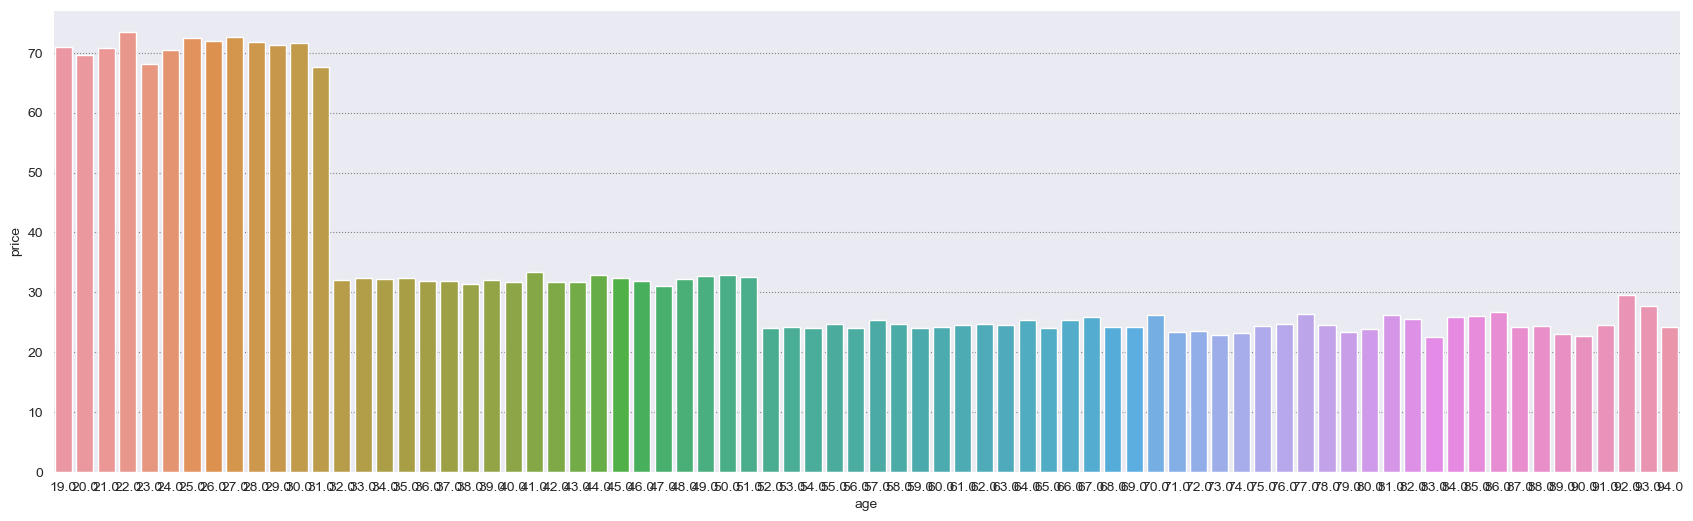

In [209]:
# Exemple de test stat fait avec Thomas pour comparer une tranche d'age (qualitative) et un panier moyen (quantitative)
# Visu pour tranche d'age du panier moyen
df = df_spc_b2c.copy()
# On group d'abord par age et client unqiue, on fait la somme de ses achats ensuite on groupe direct juste avec les ages et on fait la moyenne
# Cela nous donne le panier moyen par age et permet de voir si des tranches d'ages se détachent
mean_price_by_age = df.groupby(['age', 'session_id'], as_index=False)['price'].sum().groupby(['age'], as_index=False)['price'].mean()
display(mean_price_by_age.head(10))

fig, ax  = plt.subplots(figsize=(21, 6))
sns.barplot(data=mean_price_by_age, x='age', y='price')


In [207]:
# On groupe par age et client unique et on calcul le total de son panier
df.groupby(['age', 'session_id'], as_index=False)['price'].sum()

,age,session_id,price
0,19.0,s_10098,26.30
1,19.0,s_10128,13.11
2,19.0,s_10162,62.44
3,19.0,s_10168,69.99
4,19.0,s_10169,120.98
...,...,...,...
308507,94.0,s_83514,13.11
308508,94.0,s_87562,84.49
308509,94.0,s_92980,7.99
308510,94.0,s_95446,21.19


In [210]:
# On groupby tout de suite après juste sur les ages et on calcul le panier moyen
df.groupby(['age', 'session_id'], as_index=False)['price'].sum().groupby(['age'], as_index=False)['price'].mean()

,age,price
0,19.0,70.904475
1,20.0,69.577999
2,21.0,70.755105
3,22.0,73.533387
4,23.0,68.098325
...,...,...
71,90.0,22.720089
72,91.0,24.508367
73,92.0,29.573516
74,93.0,27.686993


In [193]:
# Les varainces ne sont pas égales
# Voir la variance par tranche d'age
print(mean_price_by_age['age'].var())
print(mean_price_by_age['price'].var())
# Voir les variances par classe d'age ? Peut être qu'elles sont faibles pour une ANOVA

487.6666666666667
289.37021214971116


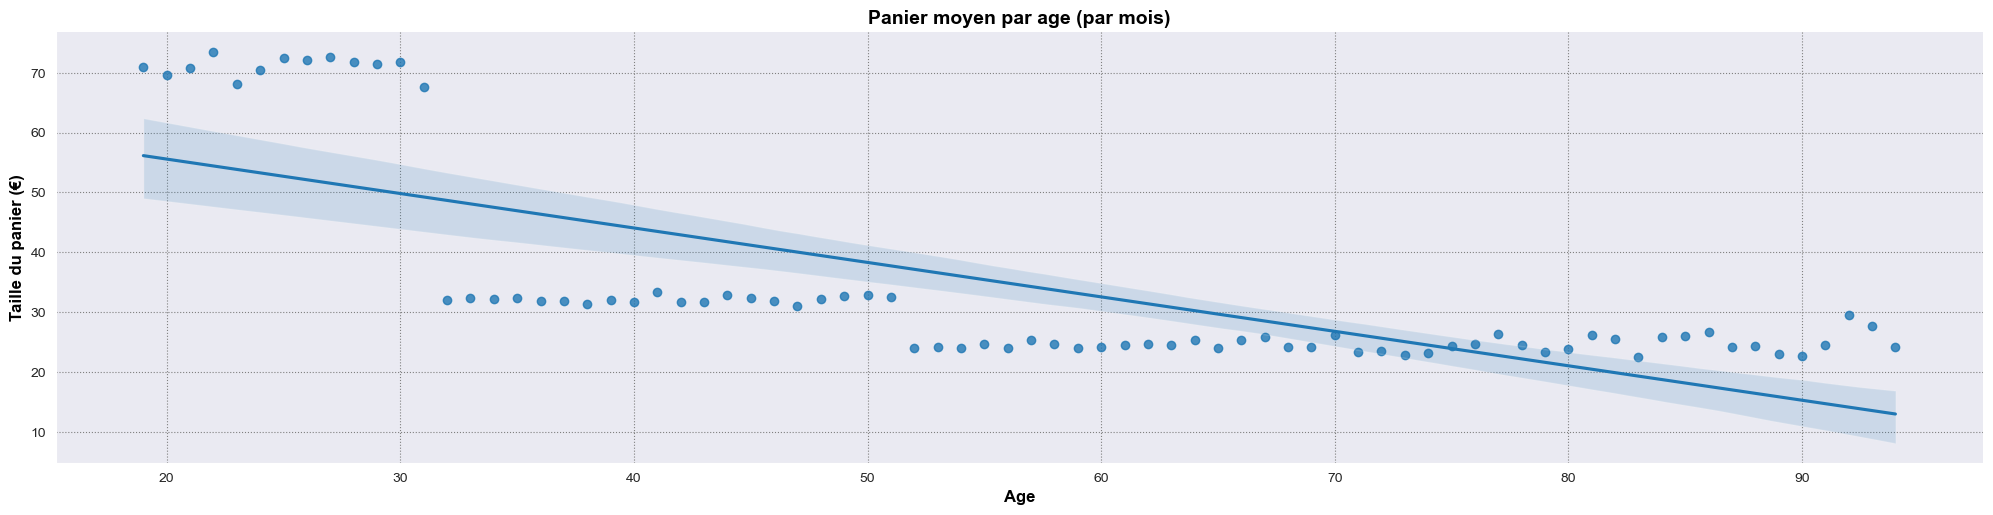

y = -0.5754290649681757 * x + 67.08507619089298


In [194]:
# Regression linéaire avec lmplot, on considérant age et panier moyen comme variables quantitatives

sns.lmplot(data = mean_price_by_age, x = 'age', y = 'price', aspect = 4)

plt.title('Panier moyen par age (par mois)', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Taille du panier (€)', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})


plt.show()

# Calcul de l'équation de la droite de régression
Y = mean_price_by_age['price']
X = mean_price_by_age[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']
print('y =', a, '* x +', b)

ShapiroResult(statistic=0.6250927448272705, pvalue=1.2442449414534762e-12)
ShapiroResult(statistic=0.9549236297607422, pvalue=0.008753503672778606)


<AxesSubplot:xlabel='age', ylabel='Count'>

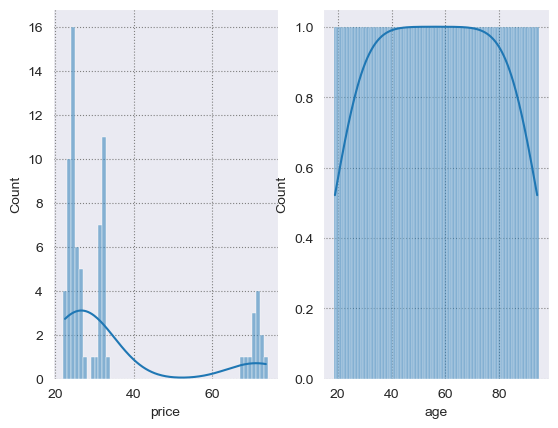

In [195]:
# Test de Shapiro sur une ou plusieurs variable
print(stats.shapiro(mean_price_by_age['price']))
print(stats.shapiro(mean_price_by_age['age']))

# Histogramme sur une variable
plt.subplot(121)
sns.histplot(mean_price_by_age['price'], kde = True, discrete=True)
plt.subplot(122)
sns.histplot(mean_price_by_age['age'], kde = True, discrete=True)
# Les distribution ne sont pas normales

In [196]:
# Test de pearson entre age et panier moyen
# Normalement on fait un spearman car les distribution ne sont pas normales mais c'est des exercices de compréhension
# On remarque un fort lien en négatif, ce qui est corrélé avec une régression linéaire
a, b = stats.pearsonr(mean_price_by_age['age'], mean_price_by_age['price'])

print(stats.pearsonr(mean_price_by_age['age'], mean_price_by_age['price']))

# pearson² = % de variation expliquée
print('Pearson : ', round(a, 2))
print('R²', round((a**2), 2))
print('p-value :', b)
# H0 : Le panier moyen ne dépend pas de l'age
# p-value =0, très forte présomption contre H0
# Plus on a de données plus on voit le lien entre l'age et le panier moyen (ce qu'on voit sur le scatterplot)
# On remarque un fort lien en négatif, ce qui est corrélé avec une régression linéaire

PearsonRResult(statistic=-0.7470100053163595, pvalue=9.286819375559402e-15)
Pearson :  -0.75
R² 0.56
p-value : 9.286819375559402e-15


In [197]:
# Comme au moins une variable n'a pas un distribution normale on fait un test non paramétrique
a, b = stats.spearmanr(mean_price_by_age['age'], mean_price_by_age['price'])
print('Spearman : ', round(a, 2))
print('p-value :', b)

Spearman :  -0.77
p-value : 3.774874303823763e-16


In [198]:
# On prend nos données de test
sous_echantillon = mean_price_by_age.copy() # copy() pour par modifier l'original
sous_echantillon

   
# Test ANOVA pour essayer en considérant age comme une variable qualitative

# On défini les deux variables que l'on veut prendre dans le df à tester
X = 'price' # qualitative
Y = 'age' # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

# ANOVA > 0,donc possible lien entre ces deux variables
# H0 rejetée, l'age influe sur la catégorie achetée par le client
# ANOVA toutefois faible, sur le boxplot on remarque un lien entre l'age et les categ 0 et 1 dont les moyennes sont proches, la categ 2 est plus appréciée des jeunes
print('eta² :', round(eta_squared(mean_price_by_age[X],mean_price_by_age[Y]), 4)) # Applique la fonction sur nos deux variables dans notre échantillon ou df et calcul le rapport de corrélation
 
    # Si ANOVA = 0, pas de relation
    # Si > 0, probable relation

eta² : 1.0


In [199]:
# On remarque que la distribution des ages n'est pas normale, ce qui ne remplis pas toutes les conditions de l'ANOVA, on fait donc un test de Kruskal
X = 'price' # qualitative
Y = 'age' # quantitative
# Test entre l'age et la catégorie achetée (ici test avec des chiffres)
kstat, pval = stats.kruskal(mean_price_by_age[X], mean_price_by_age[Y])

# Récupérer la p-value
print('p-value :' ,pval, 'kstat :', round(kstat, 4)) # Si pval petit (au moins inférieure à 0.05, alors on peut parler de différence significative)

p-value : 8.492502313601931e-10 kstat : 37.6436


In [200]:
# Je prend deux échantillons dans deux catégories d'ages différentes
X1 = df_spc.loc[(df_spc['age'] > 50) & (df_spc['age'] <= 70)].sample(2000)
X2 = df_spc.loc[(df_spc['age'] > 70) & (df_spc['age'] <= 90)].sample(2000)

ShapiroResult(statistic=0.6309801340103149, pvalue=0.0)
ShapiroResult(statistic=0.7438558340072632, pvalue=0.0)


<AxesSubplot:xlabel='price', ylabel='Count'>

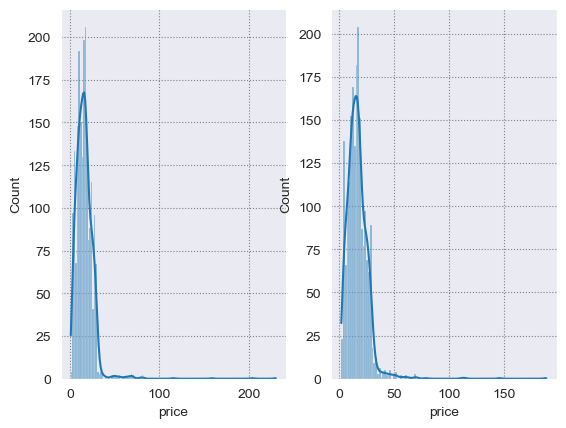

In [201]:
# On fait un Shapiro pour la forme, mais pour un test de Student n > 30 pas besoin de vérifier la normalité
print(stats.shapiro(X1['price']))
print(stats.shapiro(X2['price']))

# Histogramme sur une variable
plt.subplot(121)
sns.histplot(X1['price'], kde = True)
plt.subplot(122)
sns.histplot(X2['price'], kde = True)

In [202]:
# Anova unidirectionnelle

stats.f_oneway(X1['price'],X2['price'])

F_onewayResult(statistic=1.1013228694573796, pvalue=0.2940394052360053)

In [203]:
# Essai test de student, on regarde si le panier moyen et les même entre client de 50 a 70 ans et ceux de 70 à 90 ans

 
y = stats.ttest_ind(X1['price'],X2['price'])
print(y)
# p-value > 0.05, donc ces deux échantillons ont un panier moyen equivalent

Ttest_indResult(statistic=-1.049439311945836, pvalue=0.294039405236353)
